<a href="https://colab.research.google.com/github/levanphuoc-dev/CS231.L21_Computer-Vision-Final-Semester-Project/blob/main/Souce_code/FinalProject_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thư viện cần thiết:**

In [ ]:
import cv2
import numpy as np
import random
import imutils
import dlib
from imutils import face_utils
import argparse
from math import e, sqrt, pi
from google.colab.patches import cv2_imshow

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/shape_predictor_68_face_landmarks.dat')


**facial_landmark - facial feature points: các điểm đặc trưng trên khuôn mặt**

In [ ]:
gmin = -1
def findtop(img, coord):
    global gmin
    mask = process(img)
    #cv2.imshow('mask', mask)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    x, y = coord
    y = y-10
    if(gmin == -1):
        gmin = y+1
    else:
        if(gmin+20<y):
            y = gmin+20
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(lab)
    while(1):
        #img[y:y+1,x:x+1] = np.zeros((1,1),'uint8')
        if(y==0):
            break
        y-=1
        if(abs(l.item(y,x)-l.item(y+1,x))>=15 or mask.item(y,x)==0):
            break
    gmin = y
    #cv2.imshow('img', img)
    #cv2.waitKey(0)
    return (x,y)

def draw_delaunay(img, subdiv, delaunay_color) :
    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])
    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
        cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

def triangulate(image):
    global gmin

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/shape_predictor_68_face_landmarks.dat')

    # load the input image, resize it, and convert it to grayscale
    image = imutils.resize(image, width=500)
    img = image.copy()  # used in manual editing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cx = int(.15*w)
        cy = int(.5*h)
        #cv2.rectangle(image, (x-cx, y-cx), (x+w+cx, y+h+cx), (0, 255, 0), 2)
        #cv2.imshow('x', image)
        #cv2.waitKey(0)

        # show the face number
        #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        #rect = (0, 0, image.shape[1], image.shape[0])
        subdiv = cv2.Subdiv2D((max(x-cx,0), max(y-cy,0), min(w+x+cx,image.shape[1]), min(h+y+cx,image.shape[0])))
        forehead = []
        gmin = -1
        for num, (x, y) in enumerate(shape):


            if((num>=17 and num<=27)):
                forehead.append(findtop(image, (x,y)))

            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
            #cv2_imshow(image)
            #cv2.waitKey(0)

        #cv2_imshow(image)

        for item in forehead:
            shape = np.vstack((shape, item))
            #print(item)

        #manual_select.edit_points(img, shape)


        for (x, y) in shape:
            subdiv.insert((int(x),int(y)))
        draw_delaunay(image, subdiv, (255, 255, 255))
        #cv2_imshow(image)
        #cv2.waitKey(0)

        return shape, subdiv.getTriangleList()

processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


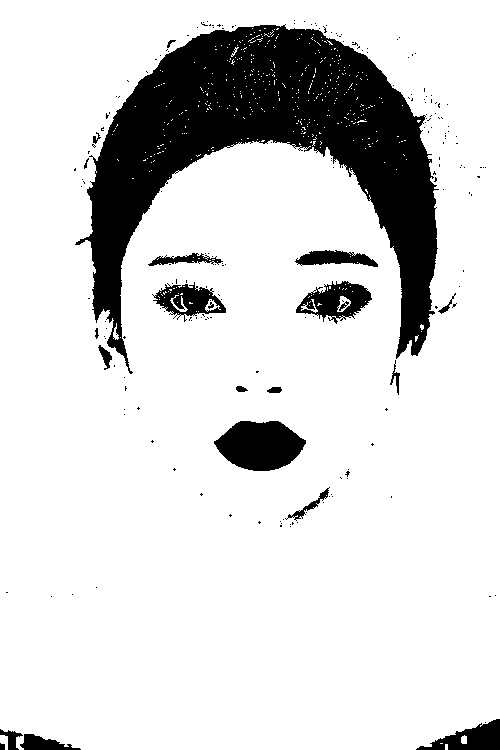

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


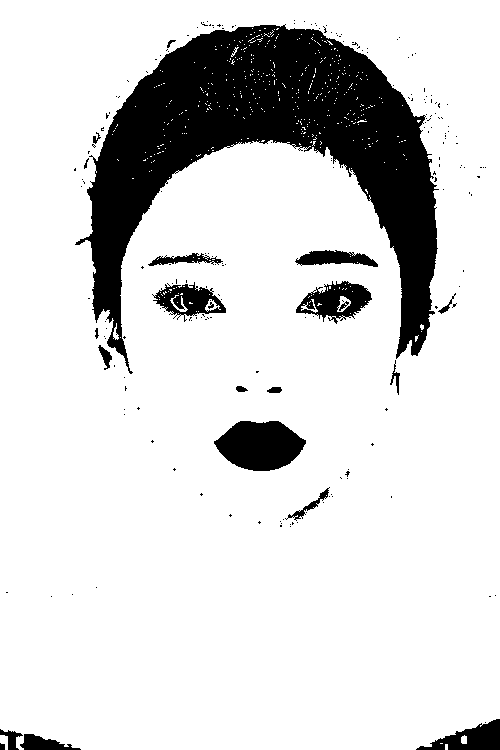

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


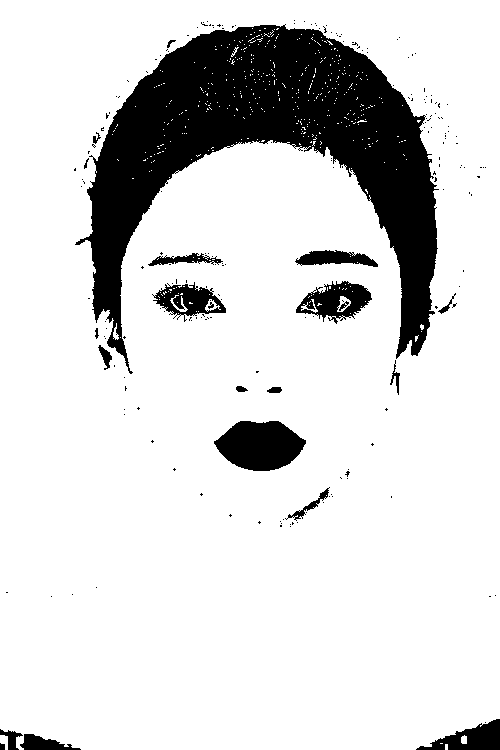

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


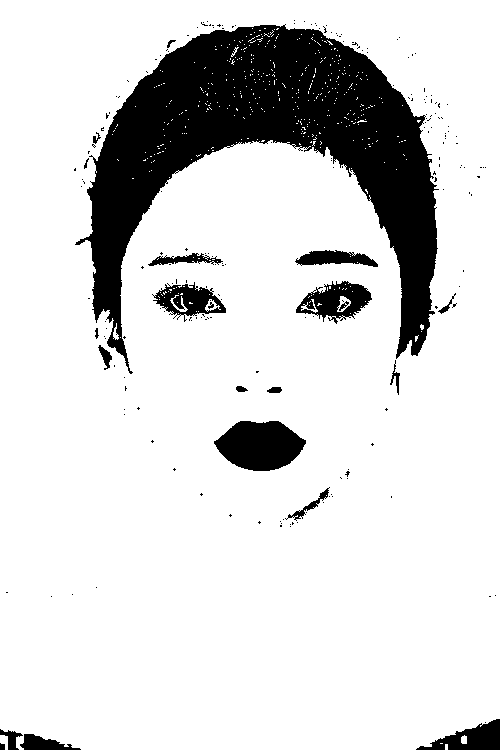

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


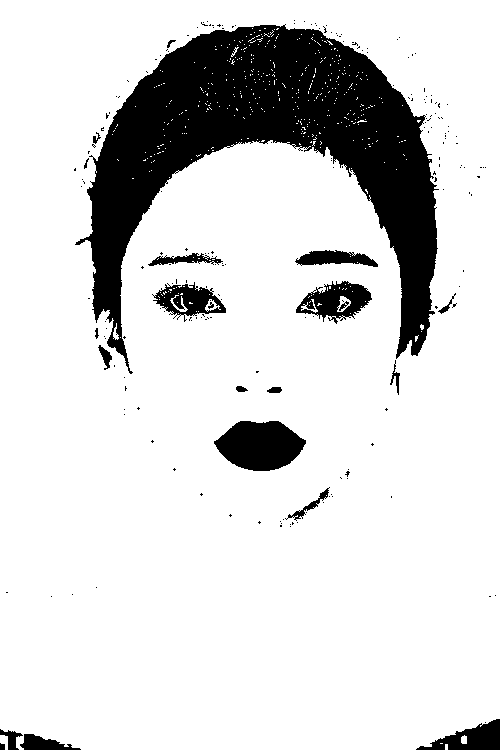

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


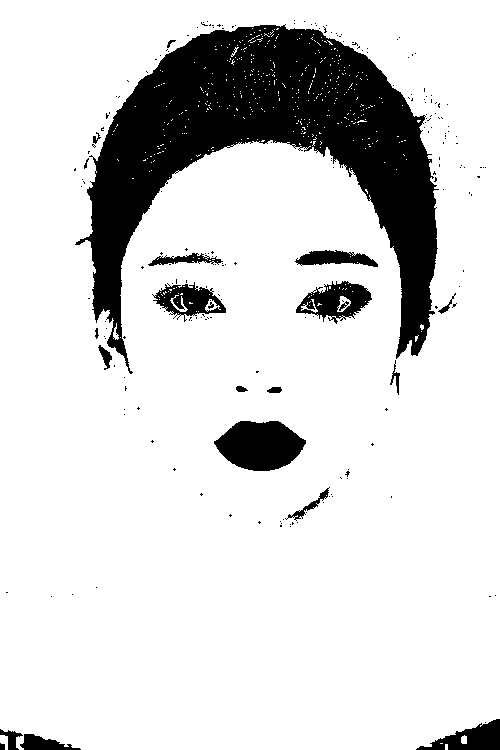

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


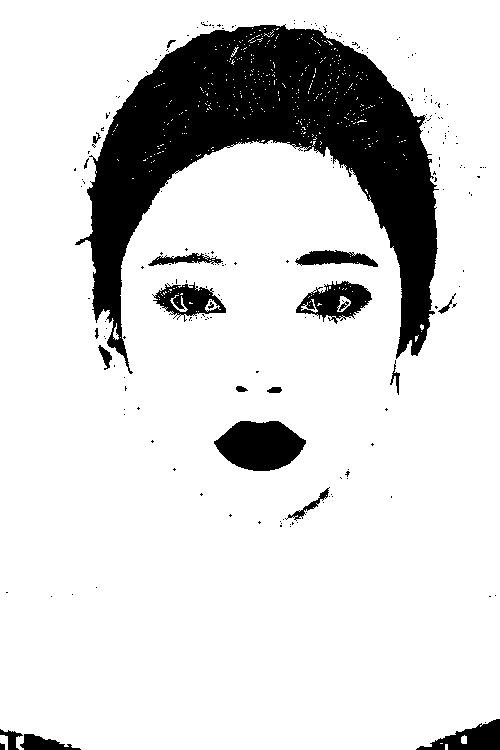

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


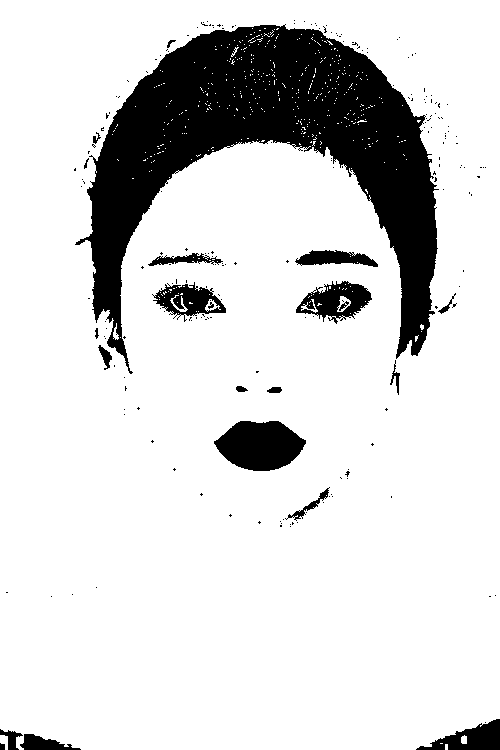

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


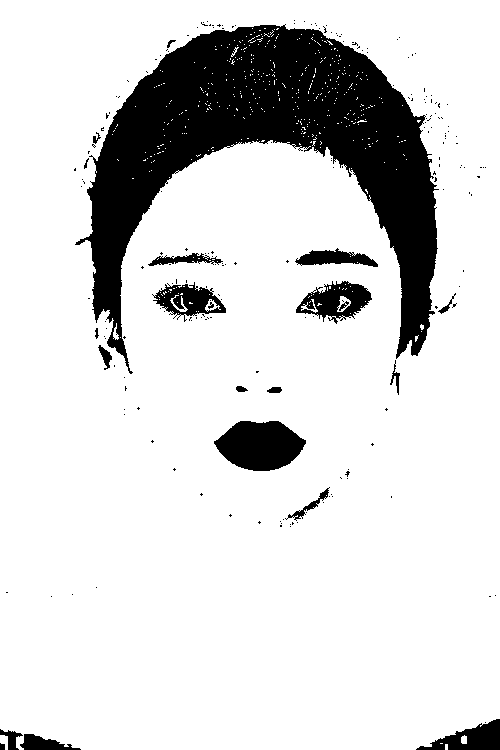

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


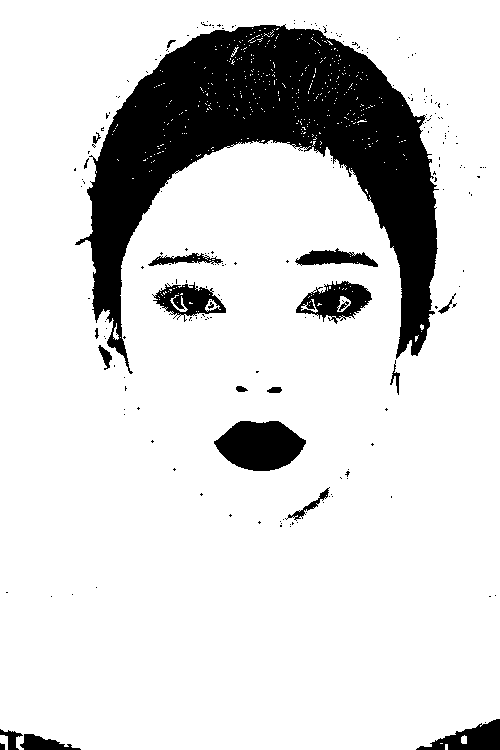

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


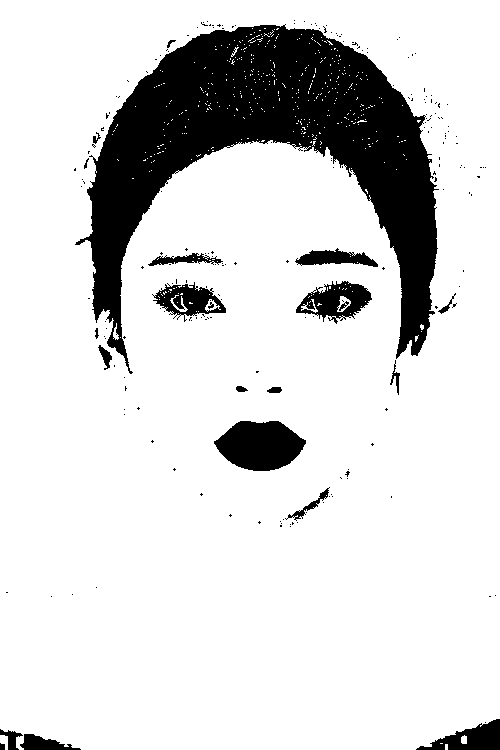

84% of the image is skin
closing mask of shape (750, 500)


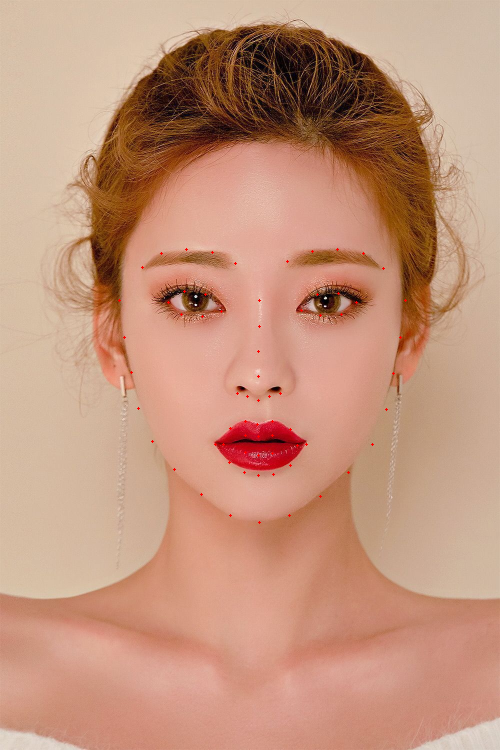

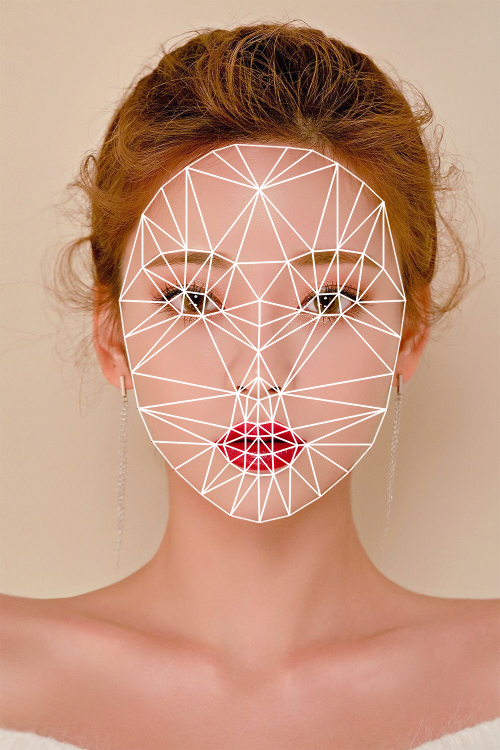

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_2.jpg')
triangulate(image)

processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


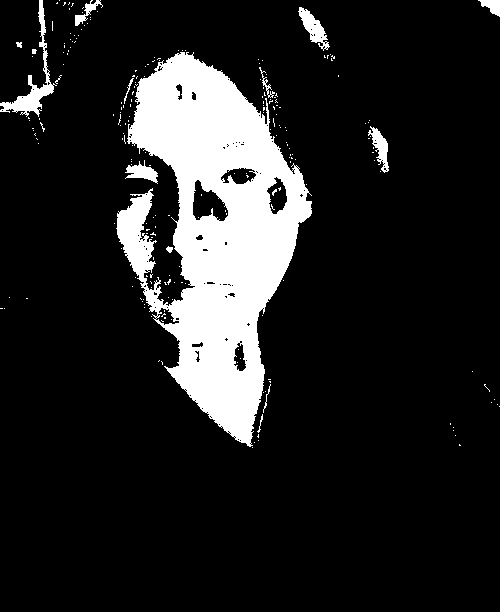

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


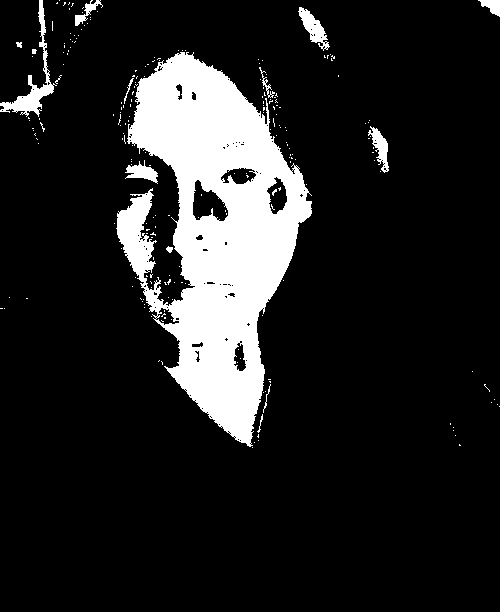

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


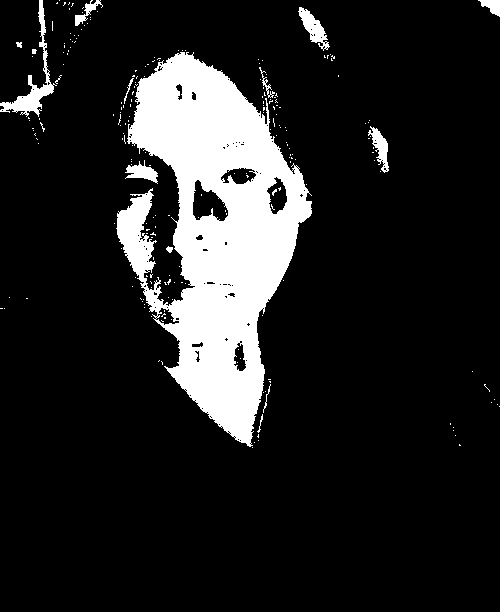

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


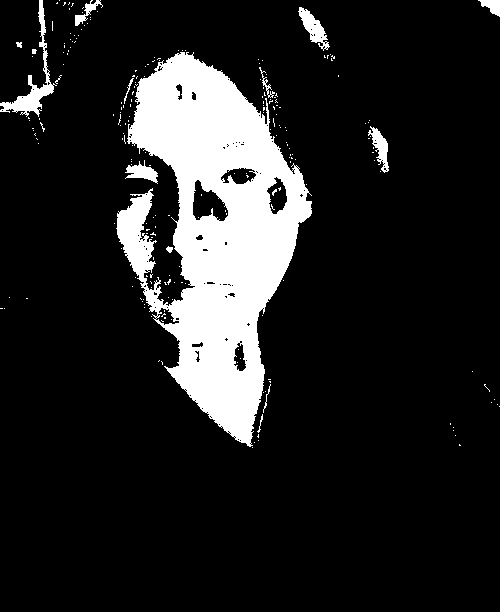

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


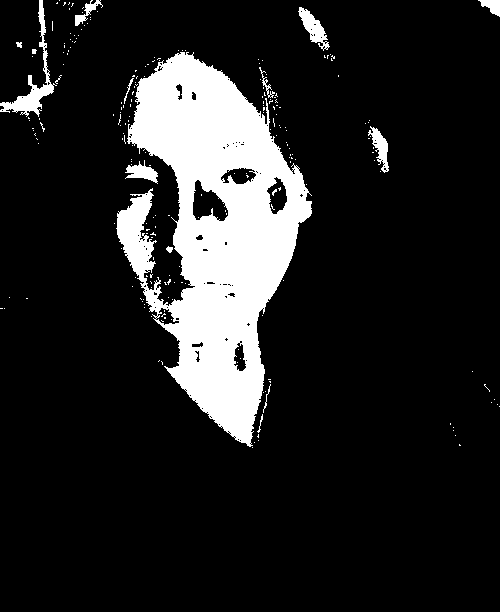

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


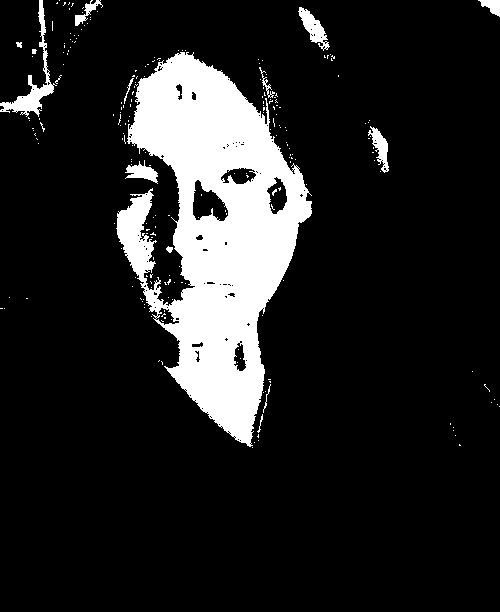

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


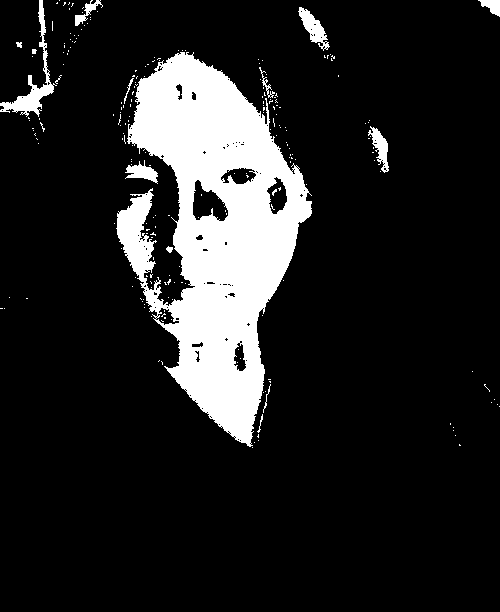

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


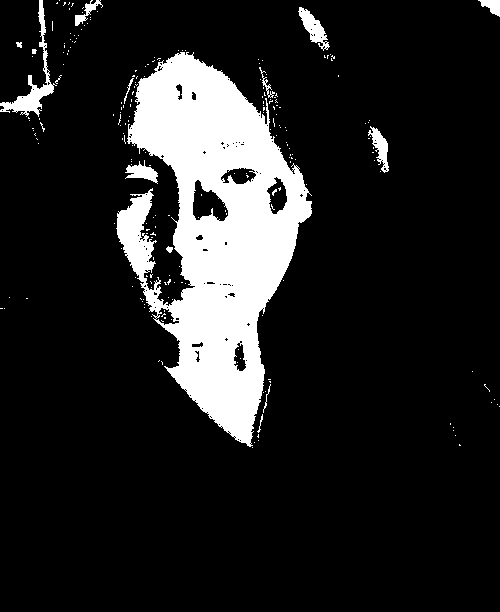

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


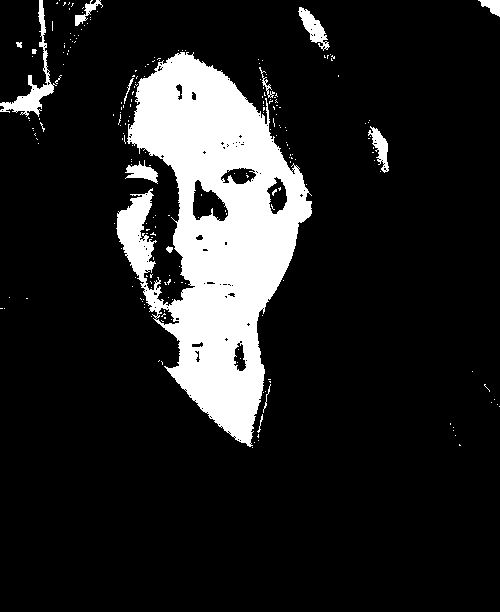

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


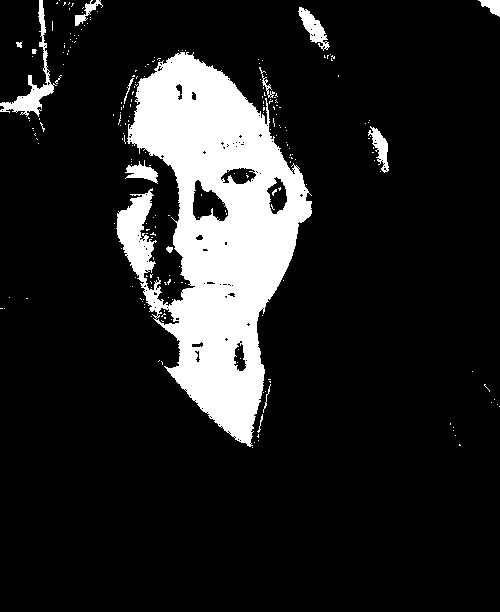

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


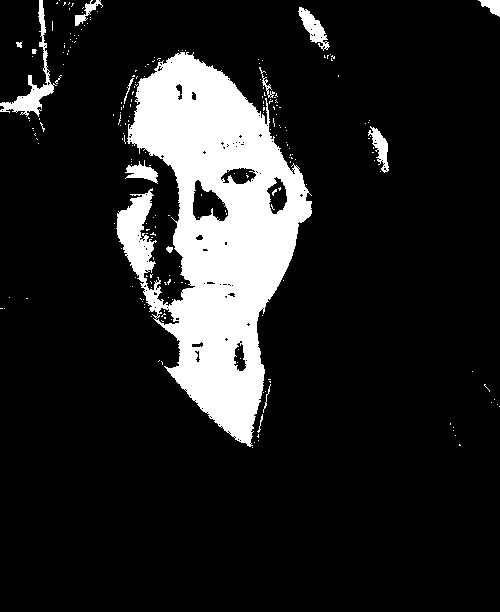

13% of the image is skin
closing mask of shape (612, 500)


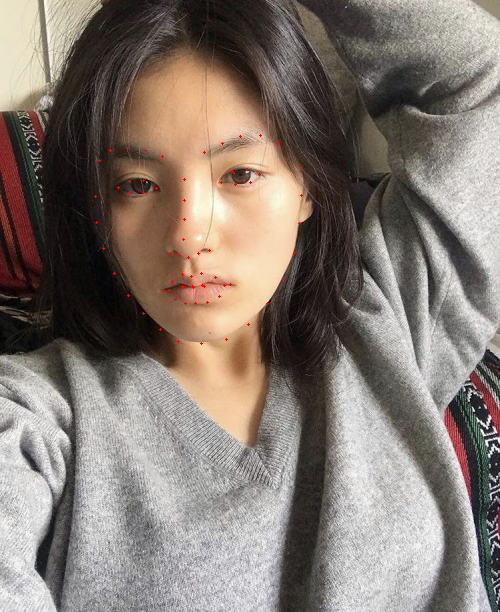

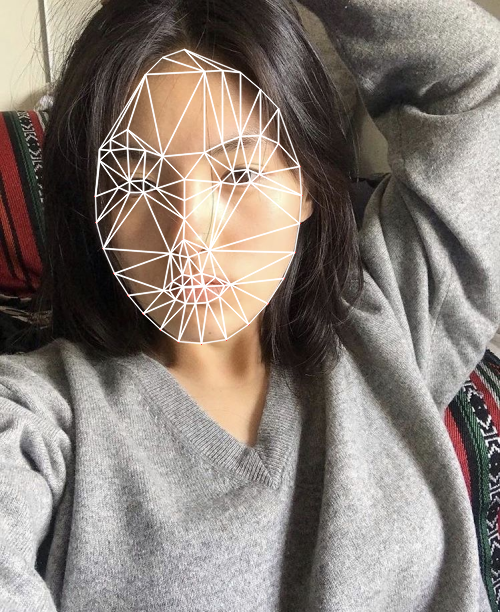

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg')
triangulate(image)

**warp.py - warping target face to subject face: làm cong mục tiêu đối mặt với đối tượng**

In [ ]:
def warp(src, dst):
    src_points, src_triangles = triangulate(src)
    dst_points, dst_triangles = triangulate(dst)
    warped_image = np.zeros(src.shape, dtype=np.uint8)

    for i,t in enumerate(dst_triangles):
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        first, second, third = -1,-1,-1
        for i2, (x,y) in enumerate(dst_points):
            if(x==t[0] and y==t[1]):
                #print('triangle '+(i)+' has first point at '+str(i2))
                #print(x,y)
                #cv2.circle(src,(x,y), 1, (i*2,0,i*3), -1)
                first = i2
            if(x==t[2] and y==t[3]):
                #print('triangle '+str(i)+' has second point at '+str(i2))
                #print(x,y)
                #cv2.circle(src,(x,y), 1, (i*2,0,i*3), -1)
                second = i2
            if(x==t[4] and y==t[5]):
                #print('triangle '+str(i)+' has third point at '+str(i2))
                #print(x,y)
                #cv2.circle(src,(x,y), 1, (i*2,0,i*3), -1)
                third = i2
        if(first>=0 and second>=0 and third>=0):
            x1,y1 = src_points[first]
            x2,y2 = src_points[second]
            x3,y3 = src_points[third]
            dx1,dy1 = dst_points[first]
            dx2,dy2 = dst_points[second]
            dx3,dy3 = dst_points[third]

            #creating mask in destination image
            mask = np.zeros(src.shape, dtype=np.uint8)
            roi_corners = np.array([[dx1,dy1],[dx2,dy2],[dx3,dy3]], dtype=np.int32)
            cv2.fillPoly(mask, [roi_corners], (255,255,255))

            #warping src image to destination image
            pts1 = np.float32([[x1,y1],[x2,y2],[x3,y3]])
            pts2 = np.float32([[dx1,dy1],[dx2,dy2],[dx3,dy3]])
            M = cv2.getAffineTransform(pts1,pts2)
            rows,cols,ch = src.shape
            res = cv2.warpAffine(src,M,(cols,rows))

            warped_image = cv2.bitwise_or(warped_image,cv2.bitwise_and(mask,res))
            #cv2.imshow('masked_image', warped_image)
            #cv2.waitKey(0)
            '''
            cv2.line(src, pt1, pt2, (255, 255, 255), 1, cv2.LINE_AA, 0)
            cv2.line(src, pt2, pt3, (255, 255, 255), 1, cv2.LINE_AA, 0)
            cv2.line(src, pt3, pt1, (255, 255, 255), 1, cv2.LINE_AA, 0)
            '''
    #print(warped_image)
    # cv2.imshow('res',warped_image)
    # cv2.waitKey(0)
    # print('\n warped image:')
    # cv2_imshow(warped_image)

    return warped_image

processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


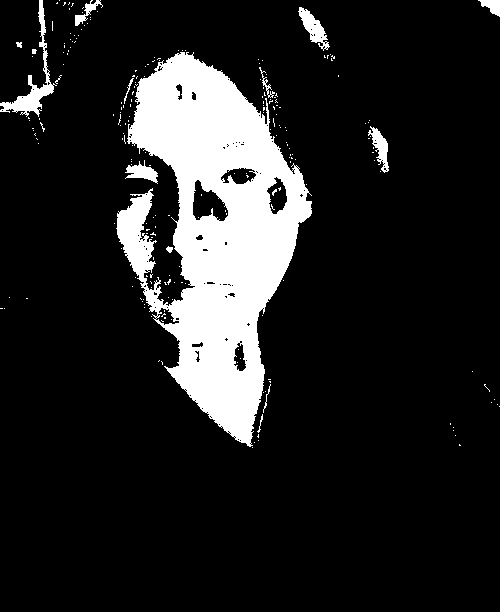

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


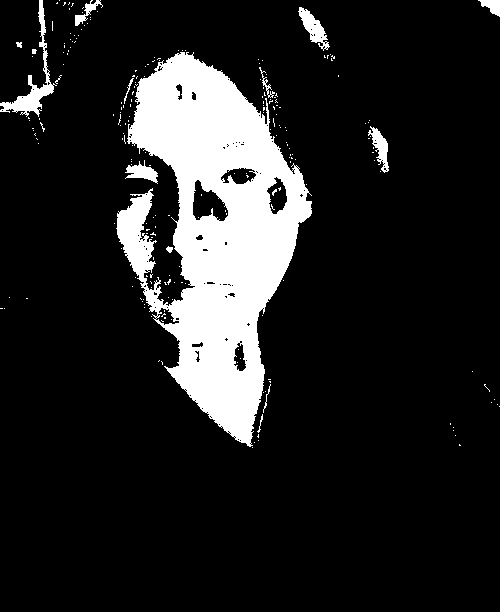

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


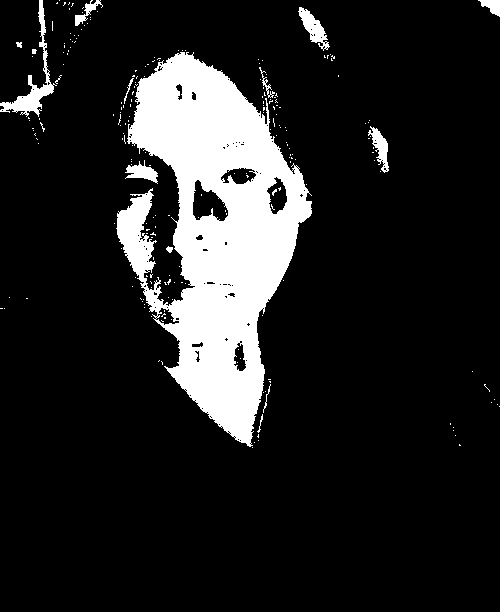

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


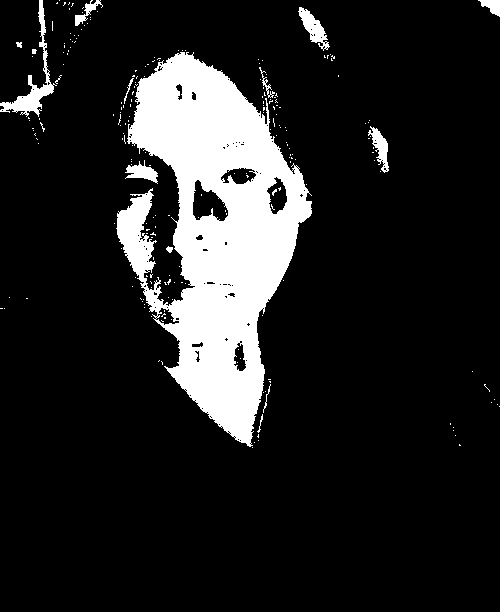

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


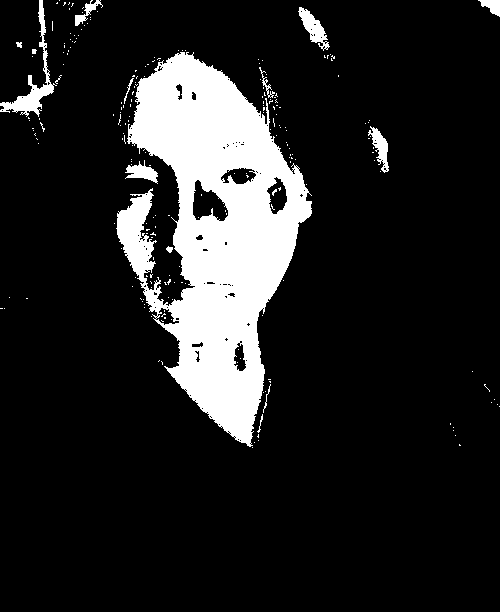

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


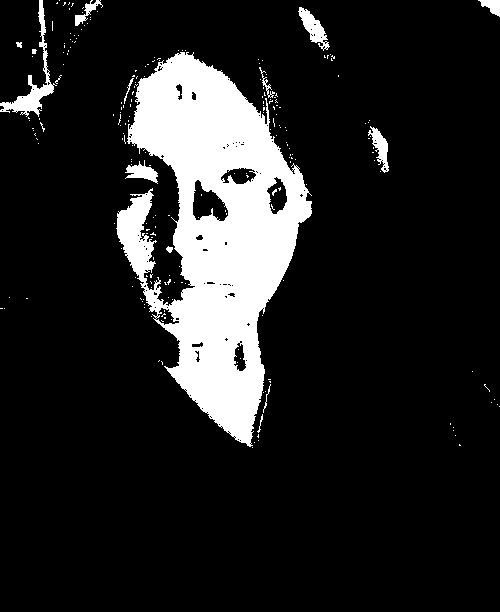

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


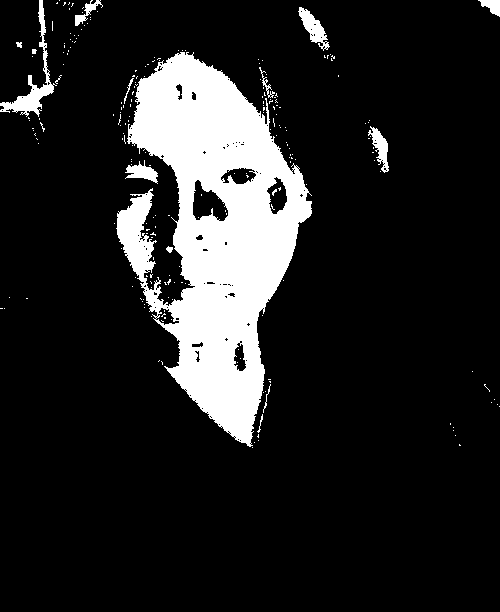

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


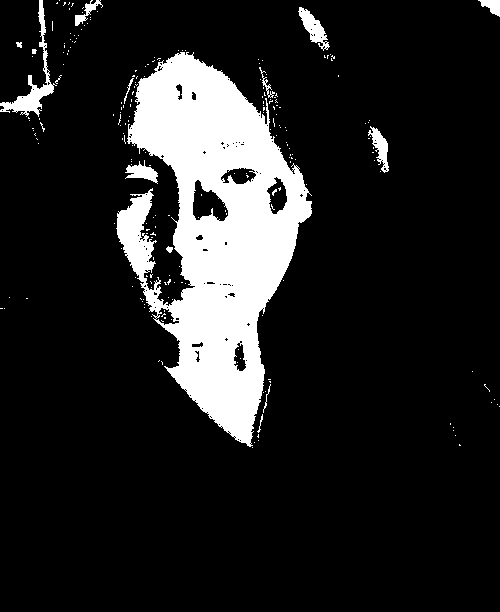

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


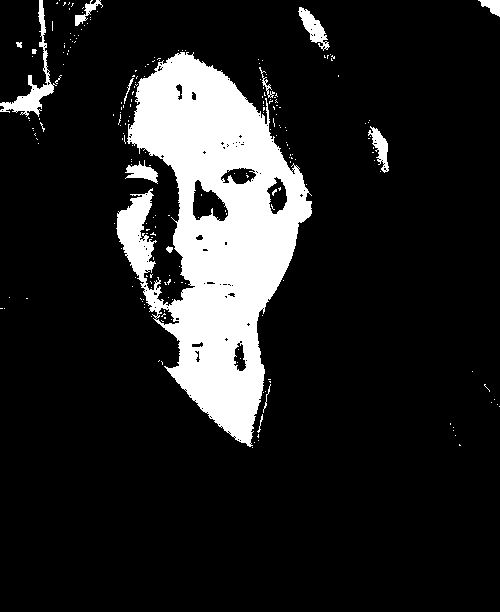

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


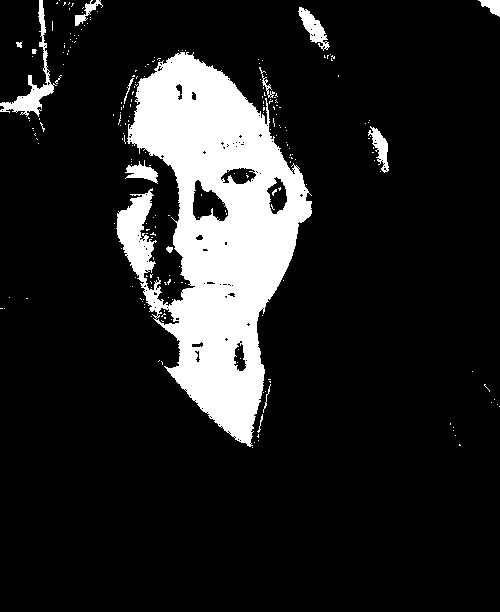

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (612, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


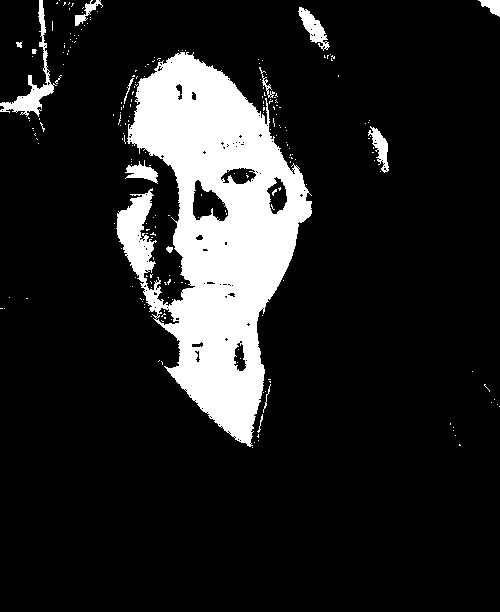

13% of the image is skin
closing mask of shape (612, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


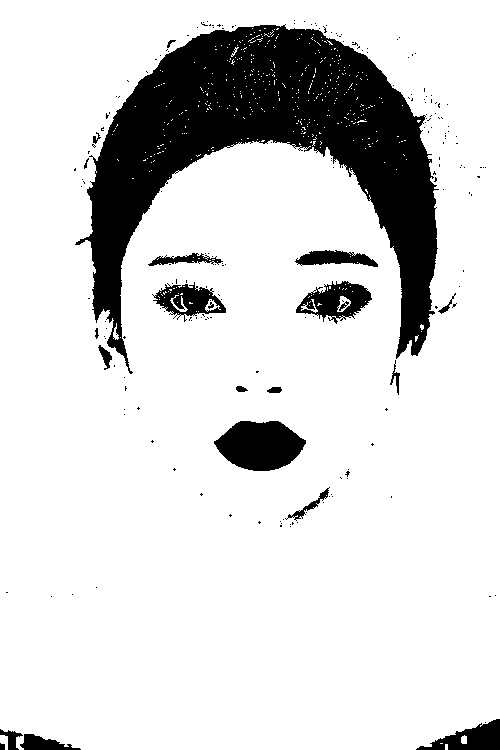

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


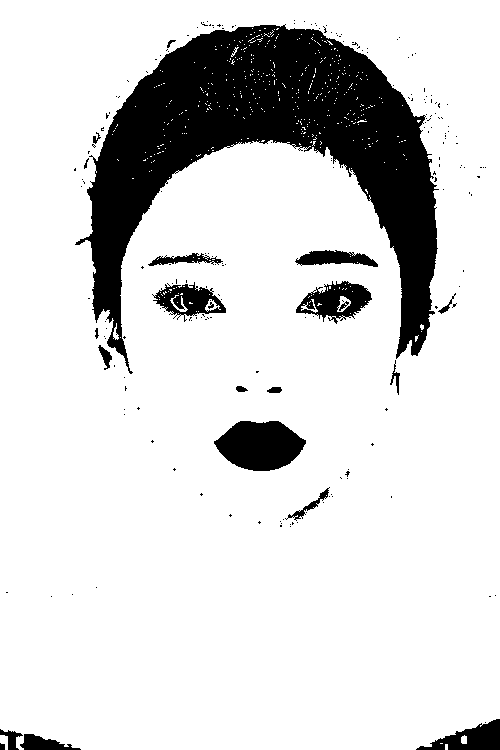

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


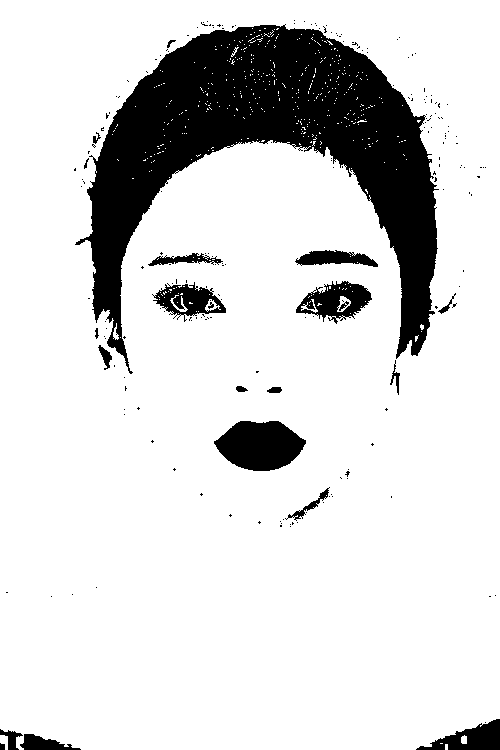

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


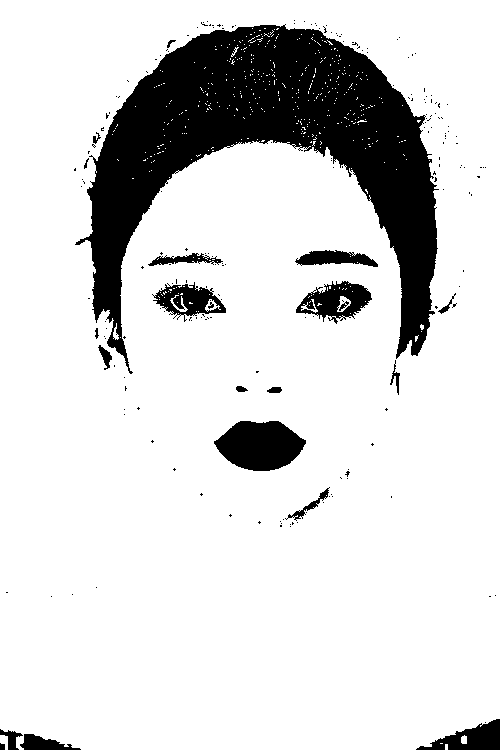

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


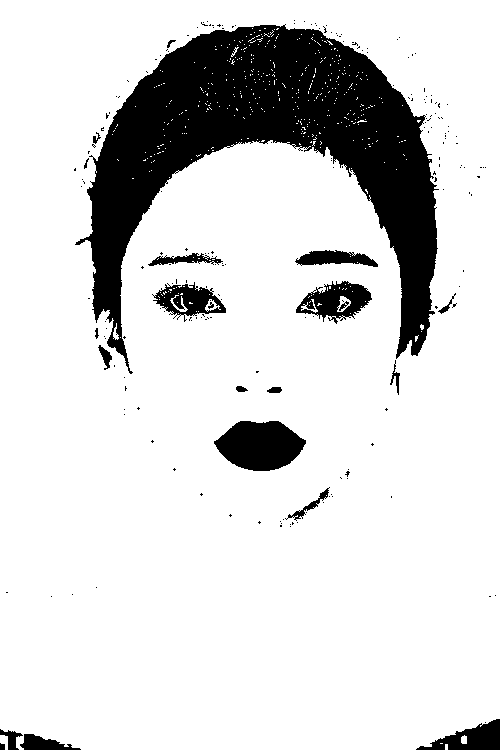

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


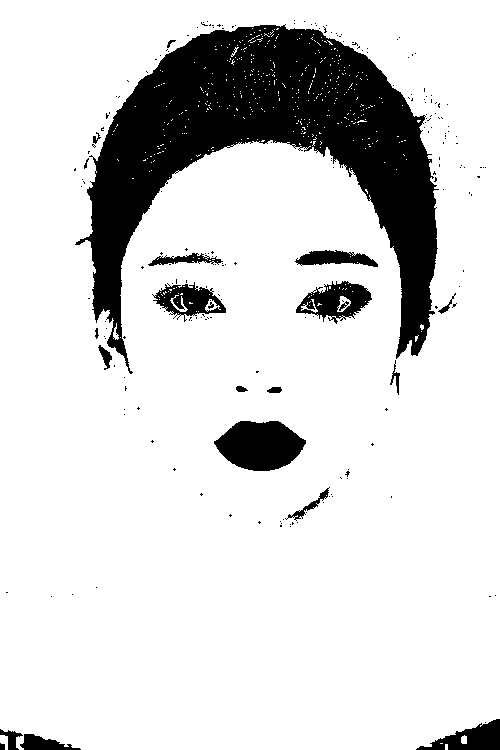

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


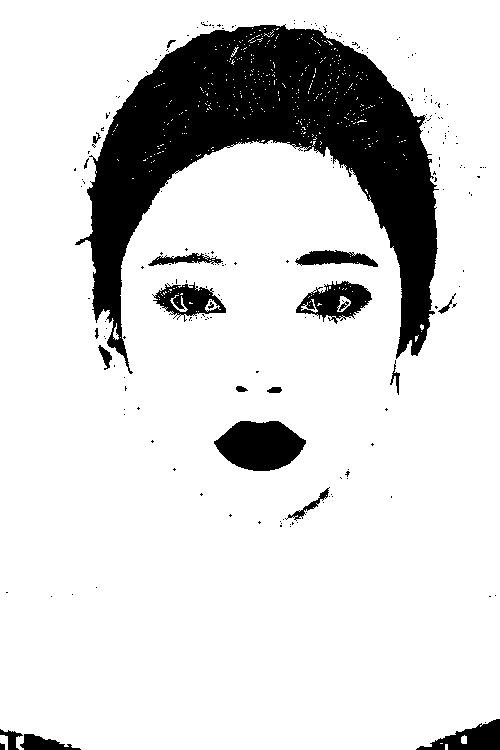

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


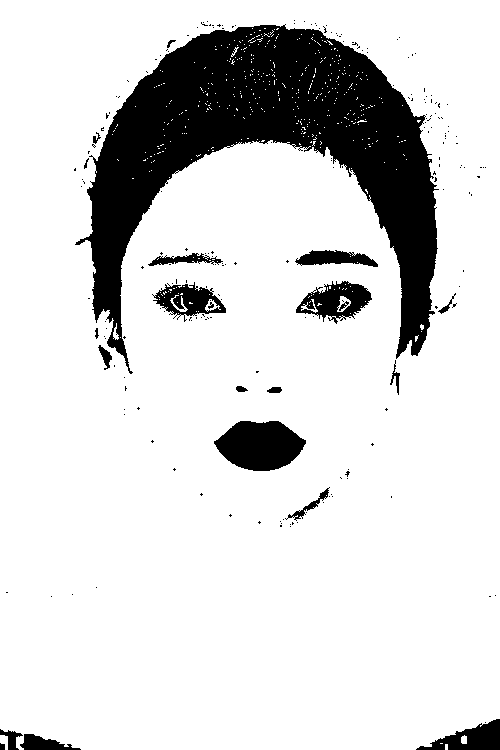

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


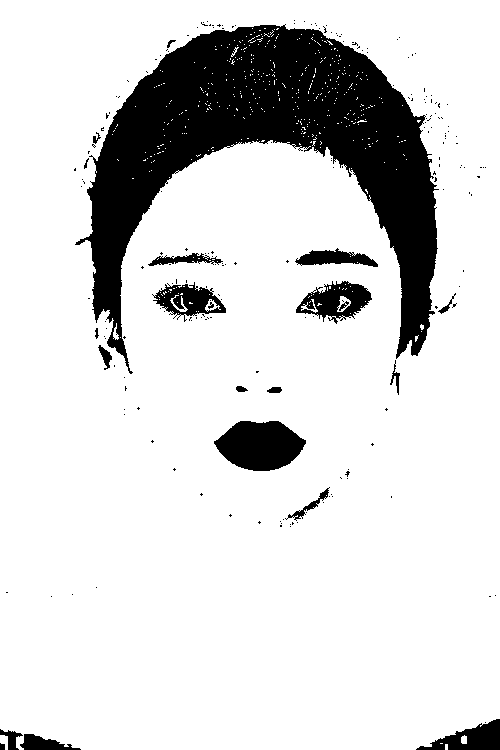

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


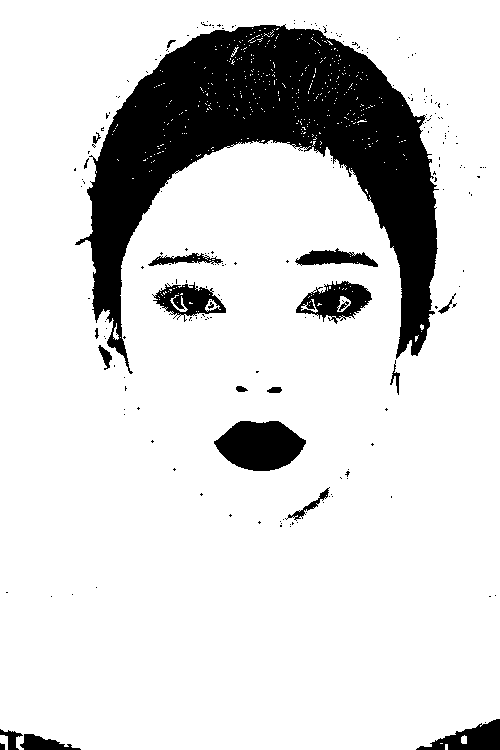

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


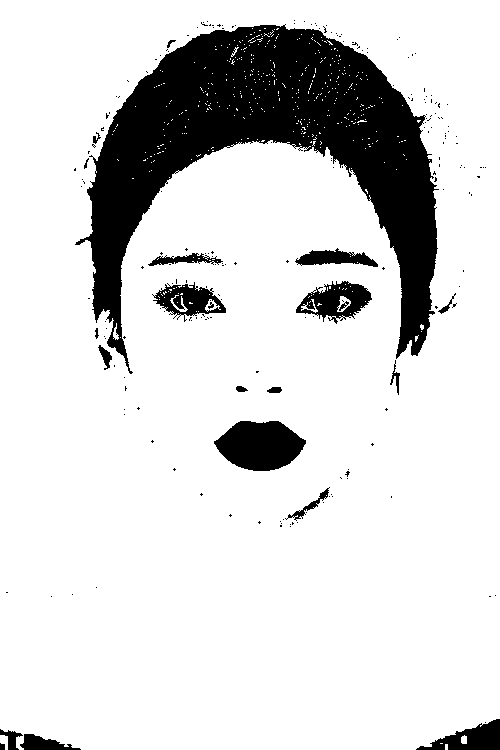

84% of the image is skin
closing mask of shape (750, 500)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

 warped image:


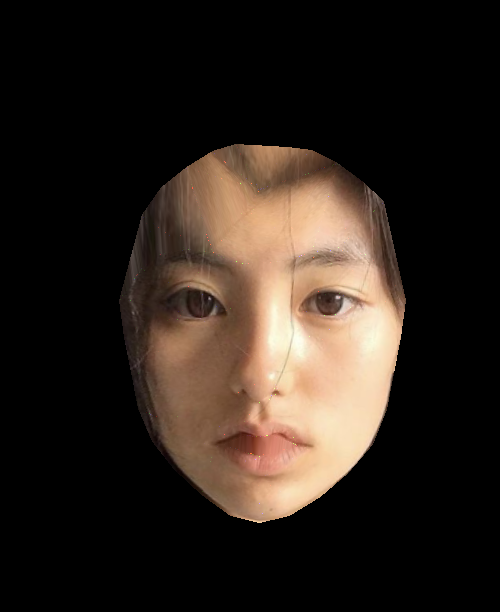

In [ ]:
subject = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg')
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_2.jpg')
subject = imutils.resize(subject, width=500)
target = imutils.resize(target, width=500)
warp(subject, target)

**skin detection: phát hiện da**

In [ ]:
def get_hsv_mask(img, debug=False):
    assert isinstance(img, np.ndarray), 'image must be a np array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    print('getting hsv mask')


    lower_thresh = np.array([0, 50, 0], dtype=np.uint8)
    upper_thresh = np.array([120, 150, 255], dtype=np.uint8)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    msk_hsv = cv2.inRange(img_hsv, lower_thresh, upper_thresh)

    #msk_hsv[msk_hsv < 128] = 0
    #msk_hsv[msk_hsv >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_hsv', msk_hsv)

    return msk_hsv.astype(float)


def get_rgb_mask(img, debug=False):
    assert isinstance(img, np.ndarray), 'image must be a np array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    print('getting rgb mask')

    lower_thresh = np.array([45, 52, 108], dtype=np.uint8)
    upper_thresh = np.array([255, 255, 255], dtype=np.uint8)

    mask_a = cv2.inRange(img, lower_thresh, upper_thresh)
    mask_b = 255 * ((img[:, :, 2] - img[:, :, 1]) / 20)
    mask_c = 255 * ((np.max(img, axis=2) - np.min(img, axis=2)) / 20)

    mask_a = mask_a.astype(float)
    print(mask_a.dtype)
    print(mask_b.dtype)
    print(mask_c.dtype)

    msk_rgb = cv2.bitwise_and(mask_a, mask_b)
    msk_rgb = cv2.bitwise_and(mask_c, msk_rgb)

    msk_rgb[msk_rgb < 128] = 0
    msk_rgb[msk_rgb >= 128] = 255

    if debug:
        scripts.display('input', img)
        scripts.display('mask_rgb', msk_rgb)

    return msk_rgb.astype(float)


def get_ycrcb_mask(img, debug=False):
    assert isinstance(img, np.ndarray), 'image must be a np array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    print('getting ycrcb mask')

    lower_thresh = np.array([90, 100, 130], dtype=np.uint8)#90
    upper_thresh = np.array([230, 120, 180], dtype=np.uint8)#230

    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh, upper_thresh)

    #msk_ycrcb[msk_ycrcb < 128] = 0
    #msk_ycrcb[msk_ycrcb >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_ycrcb', msk_ycrcb)

    return msk_ycrcb.astype(float)


def grab_cut_mask(img_col, mask, debug=False):
    assert isinstance(img_col, np.ndarray), 'image must be a np array'
    assert isinstance(mask, np.ndarray), 'mask must be a np array'
    assert img_col.ndim == 3, 'skin detection can only work on color images'
    assert mask.ndim == 2, 'mask must be 2D'

    kernel = np.ones((50, 50), np.float32) / (50 * 50)
    dst = cv2.filter2D(mask, -1, kernel)
    dst[dst != 0] = 255
    free = np.array(cv2.bitwise_not(dst), dtype=np.uint8)

    if debug:
        scripts.display('not skin', free)
        scripts.display('grabcut input', mask)

    grab_mask = np.zeros(mask.shape, dtype=np.uint8)
    grab_mask[:, :] = 2
    grab_mask[mask == 255] = 1
    grab_mask[free == 255] = 0

    if np.unique(grab_mask).tolist() == [0, 1]:
        logger.debug('conducting grabcut')
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        if img_col.size != 0:
            mask, bgdModel, fgdModel = cv2.grabCut(img_col, grab_mask, None, bgdModel, fgdModel, 5,
                                                   cv2.GC_INIT_WITH_MASK)
            mask = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)
        else:
            logger.warning('img_col is empty')

    return mask


def closing(mask):
    assert isinstance(mask, np.ndarray), 'mask must be a np array'
    assert mask.ndim == 2, 'mask must be a greyscale image'
    print("closing mask of shape {0}".format(mask.shape))

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)

    return mask


def process(img, thresh=0.5, debug=False):
    assert isinstance(img, np.ndarray), 'image must be a np array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    print("processing image of shape {0}".format(img.shape))

    mask_hsv = get_hsv_mask(img, debug=debug)
    mask_rgb = get_rgb_mask(img, debug=debug)
    mask_ycrcb = get_ycrcb_mask(img, debug=debug)

    n_masks = 3.0
    #cv2.imshow('1',mask_hsv)
    #cv2.imshow('2',mask_rgb)
    #cv2.imshow('3',mask_ycrcb)

    # print('mask hsv:')
    # cv2_imshow(mask_hsv)
    # print('mask rgb: ')
    # cv2_imshow(mask_rgb)
    # print('mask ycrcb: ')
    # cv2_imshow(mask_ycrcb)

    mask = np.where((mask_hsv + mask_rgb + mask_ycrcb)/3>255/2,255,0)
    #cv2.imshow('4',mask)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    print('mask: ')
    cv2_imshow(mask)

    #mask[mask < thresh] = 0.0
    #mask[mask >= thresh] = 255.0
    print('{0}% of the image is skin'.format(int((100.0 / 255.0) * np.sum(mask) / mask.size)))

    mask = mask.astype(np.uint8)
    mask = closing(mask)
    mask = grab_cut_mask(img, mask, debug=debug)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=11)
    #mask = cv2.erode(mask,kernel,iterations = 1)
    # print('mask: ', mask)
    # cv2_imshow(mask)

    return mask

processing image of shape (918, 749, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask hsv:


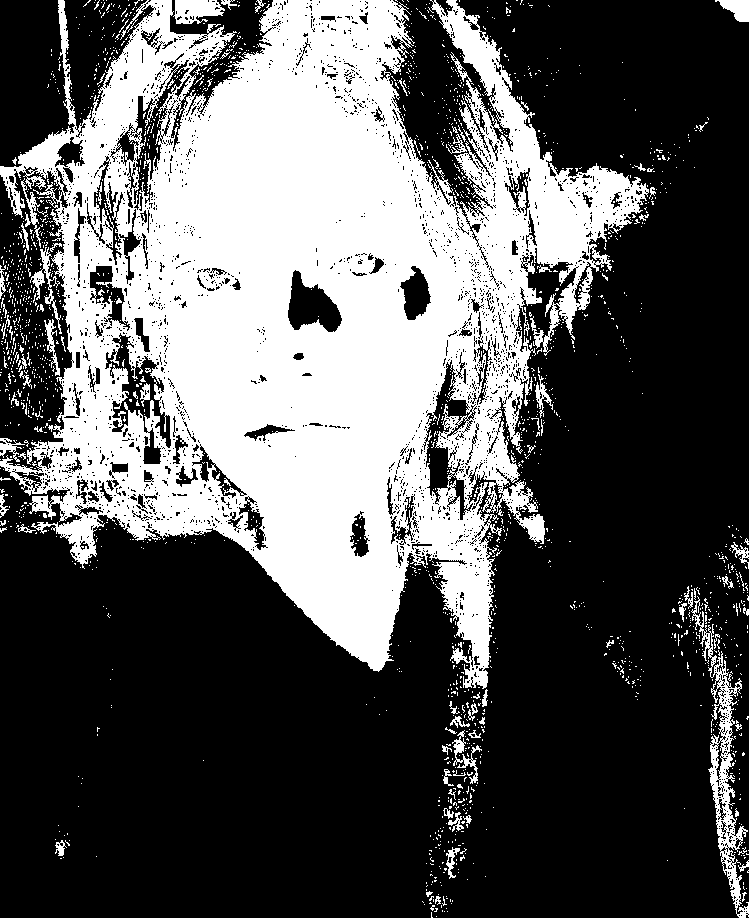

mask rgb: 


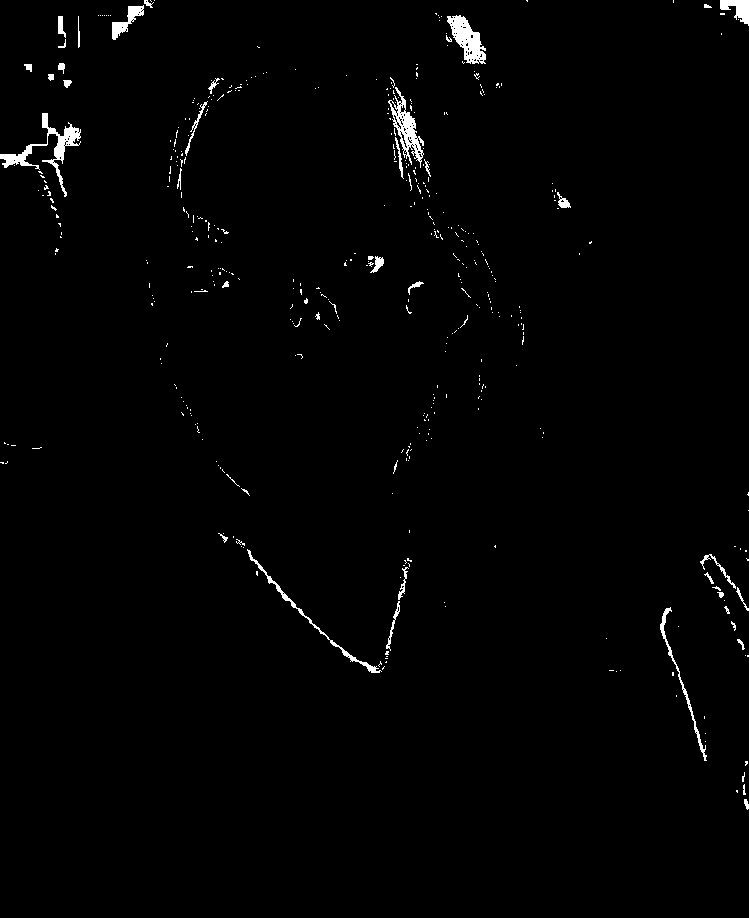

mask ycrcb: 


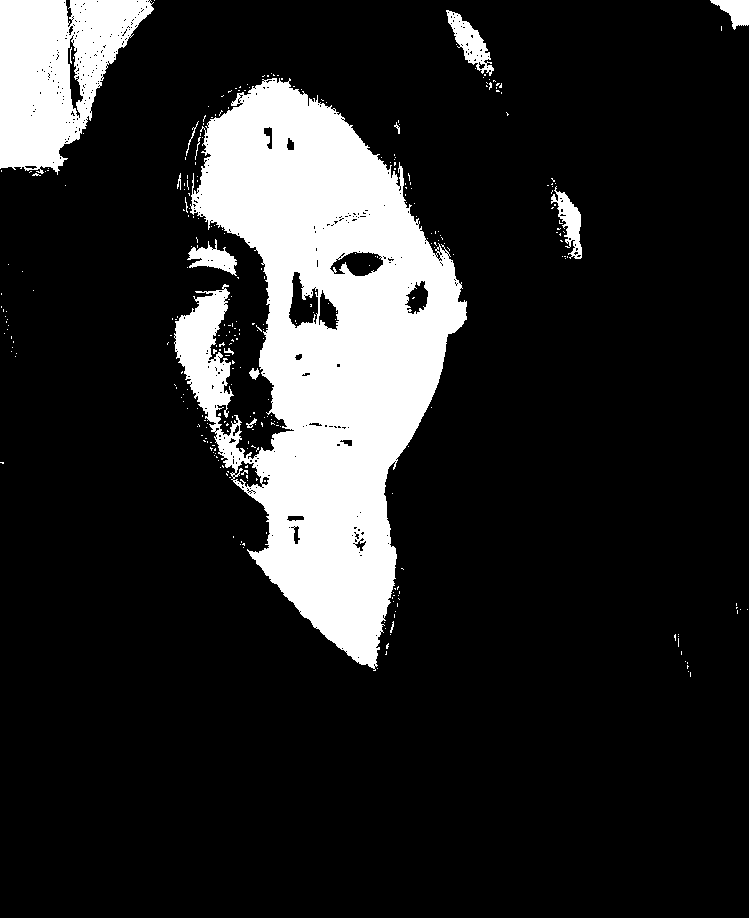

mask: 


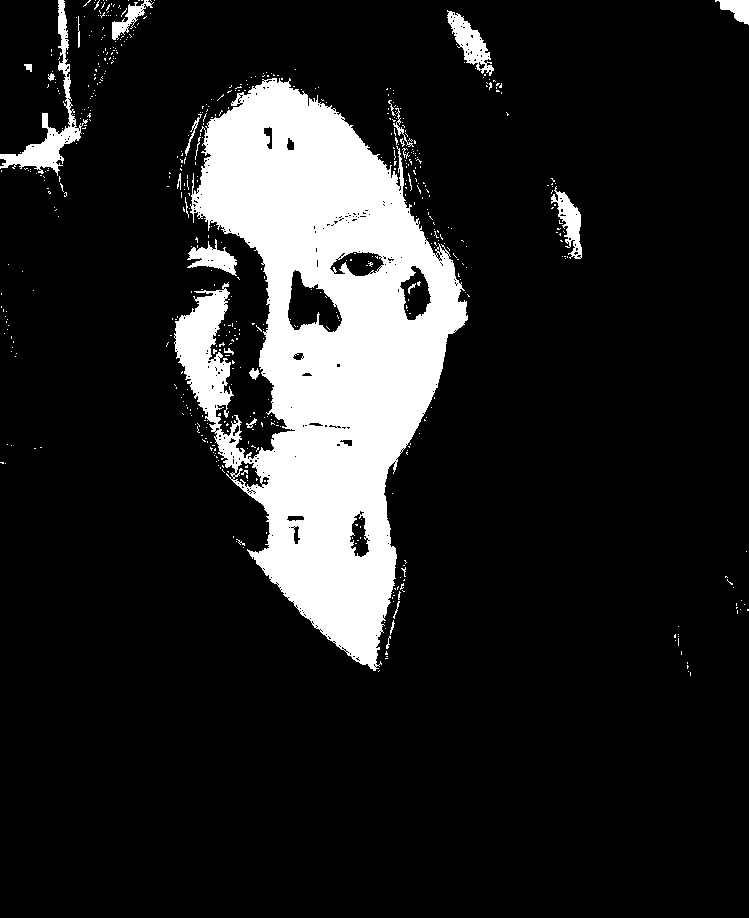

13% of the image is skin
closing mask of shape (918, 749)
mask:  [[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


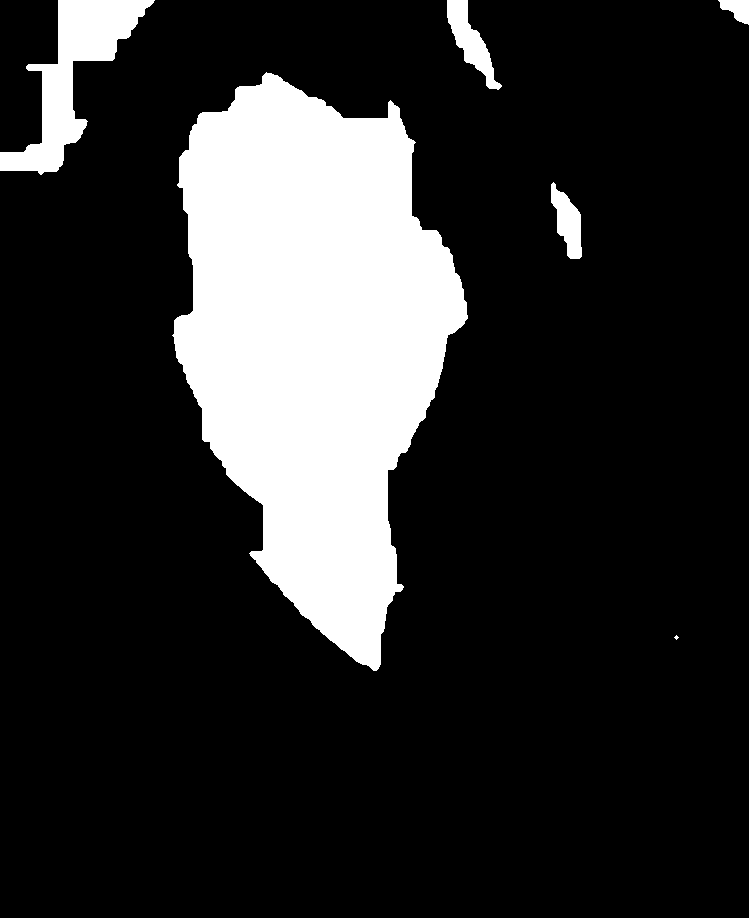

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg')
process(img)


face_parts.py - retrieving certain face parts: truy xuất các bộ phận nhất định trên khuôn mặt
lip.py - trang điểm môi

In [ ]:
def find_mask(image, betamap):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # detect faces in the grayscale image
  rects = detector(gray, 1)

  # loop over the face detections
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # loop over the face parts individually
    mask = np.zeros(image.shape, dtype=image.dtype)
    noseMask = np.zeros(image.shape, dtype=image.dtype)
    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
      clone = image.copy()
      cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
        0.7, (0, 0, 255), 2)

      if(betamap):
        if(name=='right_eyebrow' or name=='left_eyebrow'):
          continue
        if(name=='jaw'):
          continue
      else:
        if(name=='jaw' or name=='nose' or name=='left_eyebrow' or name=='right_eyebrow'):
          continue
      pts = shape[i:j]
      hull = cv2.convexHull(pts)
      if(name=='nose'):
        cv2.drawContours(noseMask, [hull], -1, (255,255,255), -1)
      else:
        cv2.drawContours(mask, [hull], -1, (255,255,255), -1)
    if(betamap):
      kernel = np.ones((5,5),np.uint8)
      dilation = cv2.dilate(mask,kernel,iterations = 4)
      gradient = cv2.morphologyEx(noseMask, cv2.MORPH_GRADIENT, kernel)
      gradient = cv2.dilate(gradient,kernel,iterations = 2)
      #cv2.imshow("Mask", mask)
      #cv2.imshow("Dilated Mask", dilation)
      #cv2.imshow("Nose Mask", gradient)
      #cv2.waitKey(0)
      #cv2.destroyAllWindows()
      print('Mask: \n')
      cv2_imshow(mask)
      print('Dilated Mask: \n')
      cv2_imshow(dilation)
      print('Nose Mask: \n')
      cv2_imshow(gradient)
      mask = dilation+gradient
      

    return mask

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


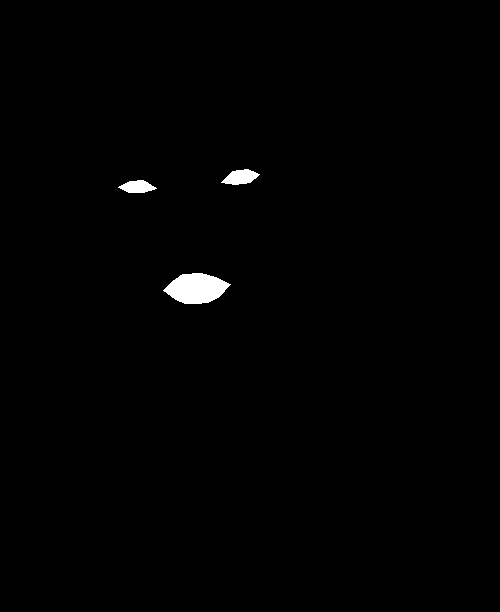

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg', 1)
image = imutils.resize(image, width=500)
mask = find_mask(image, False)
print(mask)
cv2_imshow(mask)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


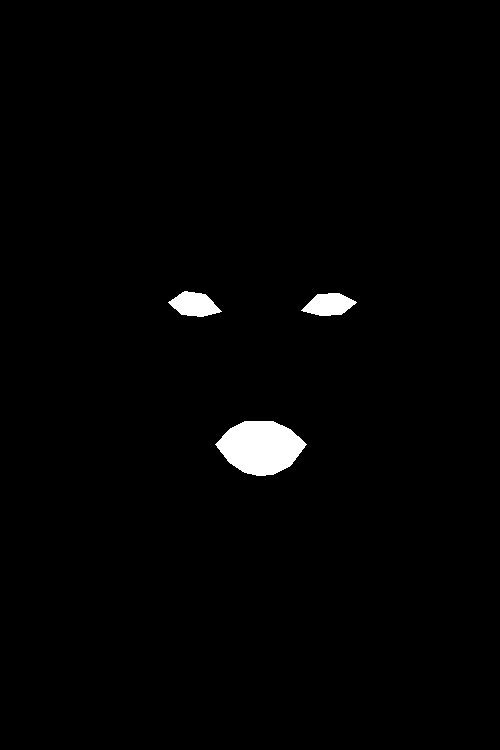

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_2.jpg', 1)
image = imutils.resize(image, width=500)
mask = find_mask(image, False)
print(mask)
cv2_imshow(mask)

**lip.py - lip makeup: trang điểm môi**

In [ ]:
def lip_makeup(subject, warped_target):

    gray_sub = cv2.cvtColor(subject, cv2.COLOR_BGR2GRAY)


    # detect faces in the grayscale image
    rects = detector(gray_sub, 1)

    upperlip_ind = [48, 49, 50, 51, 52, 53, 54, 64, 63, 62, 61, 60]
    lowerlip_ind = [48, 60, 67, 66, 65, 64, 53, 55, 56, 57, 58, 59]
    lip_pts = []


    lip_map = np.zeros(subject.shape, dtype=subject.dtype)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray_sub, rect)
        shape = face_utils.shape_to_np(shape)
        for x in range (48, 62):
            lip_pts.append(shape[x])
        C2 = cv2.convexHull(np.array(lip_pts))
        cv2.drawContours(lip_map, [C2], -1, (255, 255, 255), -1)

        lip_pts = []
        for x in range (60, 67):
            lip_pts.append(shape[x])
        C2 = cv2.convexHull(np.array(lip_pts))
        cv2.drawContours(lip_map, [C2], -1, (0, 0, 0), -1)

    #cv2.imshow('s', subject)
    #cv2.imshow('t', warped_target)
    #cv2.imshow('lip map', lip_map)
    #cv2.imwrite('add', np.where(not lip_map[:] == [0, 0, 0], lip_map, subject))
    overlay = subject.copy()
    overlay = np.where(lip_map != [0, 0, 0], lip_map, overlay)
    #cv2.imshow('overlay', overlay)

    #cv2.waitKey(0)
    #cv2.destroyAllWindows()



    l_E , _, _ = cv2.split(cv2.cvtColor(warped_target, cv2.COLOR_BGR2LAB))
    l_I , _, _ = cv2.split(cv2.cvtColor(subject, cv2.COLOR_BGR2LAB))

    print('Histogram remapping for reference image \'E\' ...')

    l_E_sum = 0
    l_E_sumsq = 0
    l_I_sum = 0
    l_I_sumsq = 0
    lip_pts = []
    for y in range(0, lip_map.shape[0]):
        for x in range(0, lip_map.shape[1]):
            # print(lip_map[y][x])
            if (lip_map[y][x][2] != 0):
                l_E_sum += l_E[y, x]    #calculating mean for only lip area
                l_E_sumsq += l_E[y, x]**2    #calculating var for only lip area
                l_I_sum += l_I[y, x]    #calculating mean for only lip area
                l_I_sumsq += l_I[y, x]**2    #calculating var for only lip area
                lip_pts.append([y, x])

    print(len(lip_pts))

    l_E_mean = l_E_sum / len(lip_pts)
    l_I_mean = l_I_sum / len(lip_pts)

    l_E_std = sqrt((l_E_sumsq / len(lip_pts)) - l_E_mean**2)
    l_I_std = sqrt((l_I_sumsq / len(lip_pts)) - l_I_mean**2)

    l_E = (l_I_std / l_E_std * (l_E - l_E_mean)) + l_I_mean  # fit the hostogram of source to match target(imgI) Luminance remapping



    def Gauss(x):
        return e ** (-0.5 * float(x))

    M = cv2.cvtColor(subject, cv2.COLOR_BGR2LAB)
    warped_target_LAB = cv2.cvtColor(warped_target, cv2.COLOR_BGR2LAB)
    counter = 0

    sample = lip_pts.copy()
    random.shuffle(sample)
    avg_maxval = 0
    for p in lip_pts:
        q_tilda = 0
        maxval = -1
        counter += 1
        print(counter / len(lip_pts) * 100, " %")
        for i in range(0, 500):
            q = sample[i]
            curr = (Gauss(((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2) / 5) * Gauss(((float(l_E[q[0]][q[1]]) - float(l_I[p[0]][p[1]])) / 255) ** 2))
            if maxval < curr:
                maxval = curr
                q_tilda = q
                if maxval >= 0.9:
                    break

        avg_maxval += maxval
        print("max = ", maxval)
        M[p[0]][p[1]] = warped_target_LAB[q_tilda[0]][q_tilda[1]]


    #cv2.imshow('M', cv2.cvtColor(M, cv2.COLOR_LAB2BGR))
    #cv2_imshow(cv2.cvtColor(M, cv2.COLOR_LAB2BGR))


    print("avgmax = ", avg_maxval/len(lip_pts))

    output = cv2.cvtColor(subject.copy(), cv2.COLOR_BGR2LAB)
    for p in lip_pts:
        output[p[0]][p[1]][1] = M[p[0]][p[1]][1]
        output[p[0]][p[1]][2] = M[p[0]][p[1]][2]

    output = cv2.cvtColor(output, cv2.COLOR_LAB2BGR)
    #cv2.imshow('out', output)
    #cv2.waitKey(0)
    #cv2.imwrite('LipOut.jpg', output)
    #cv2_imshow(output)

    return output, lip_map

bigger target
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


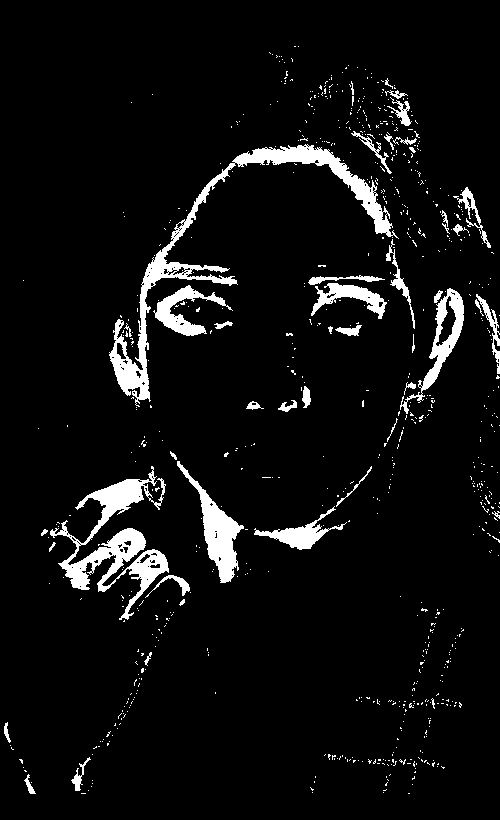

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


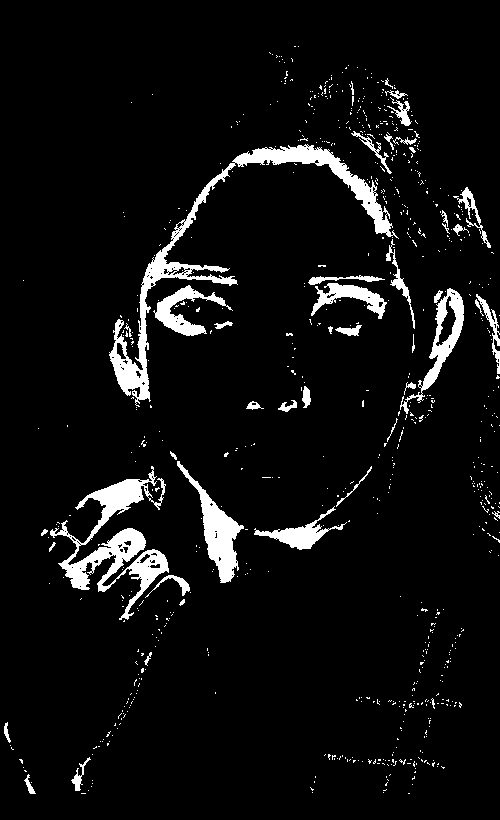

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


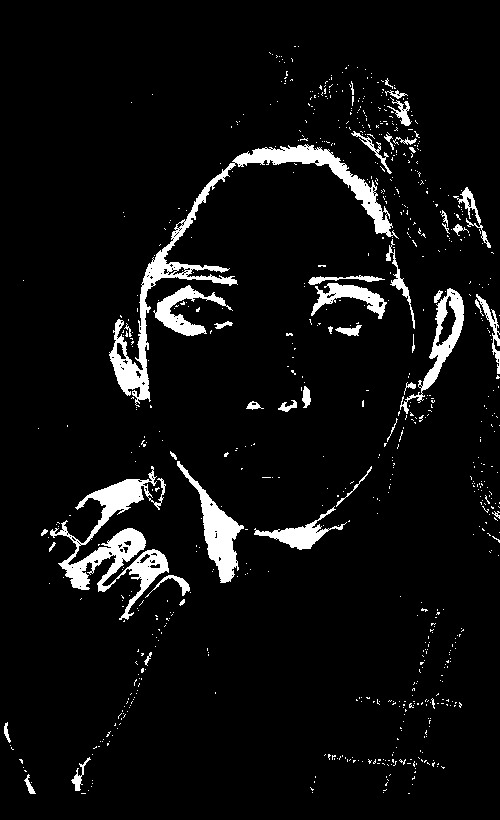

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


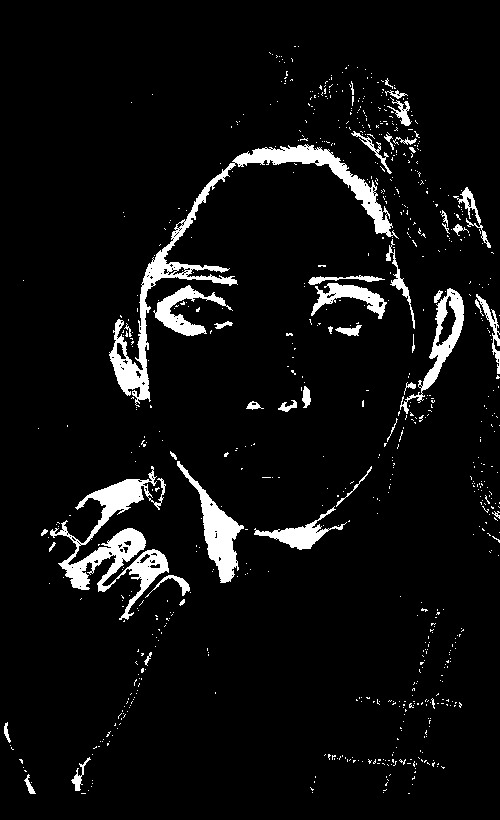

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


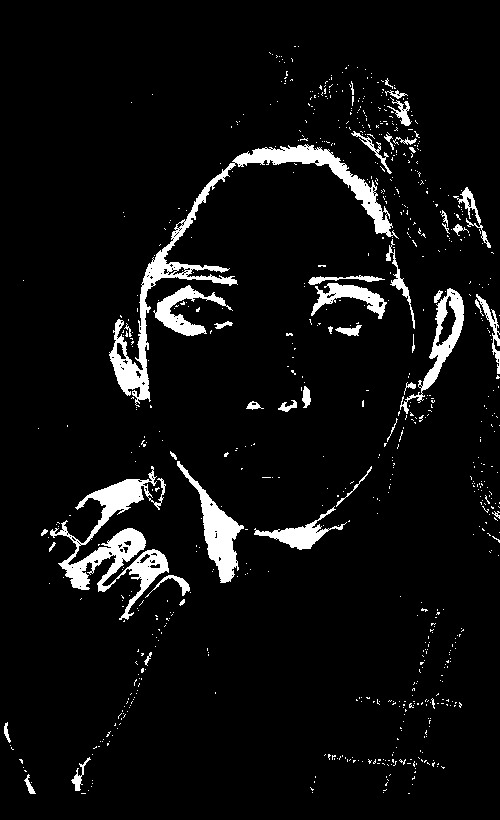

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


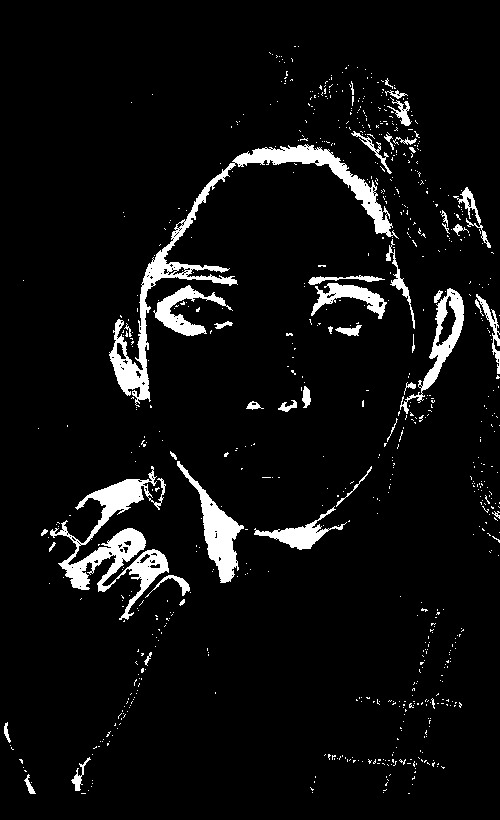

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


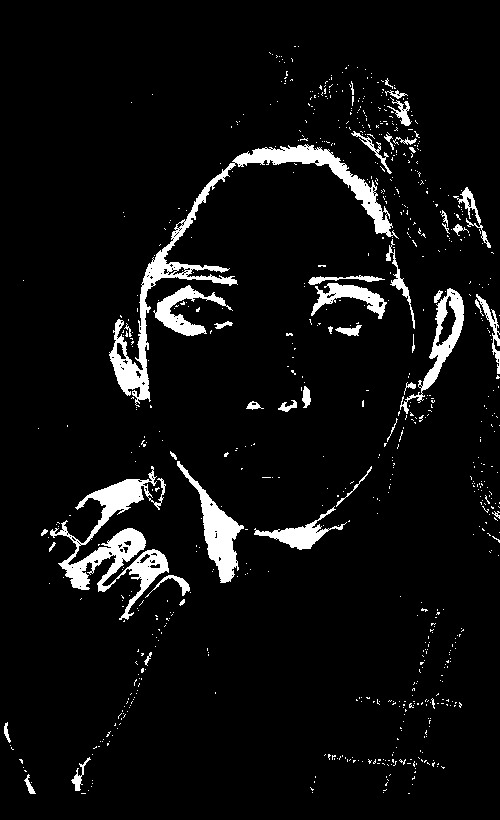

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


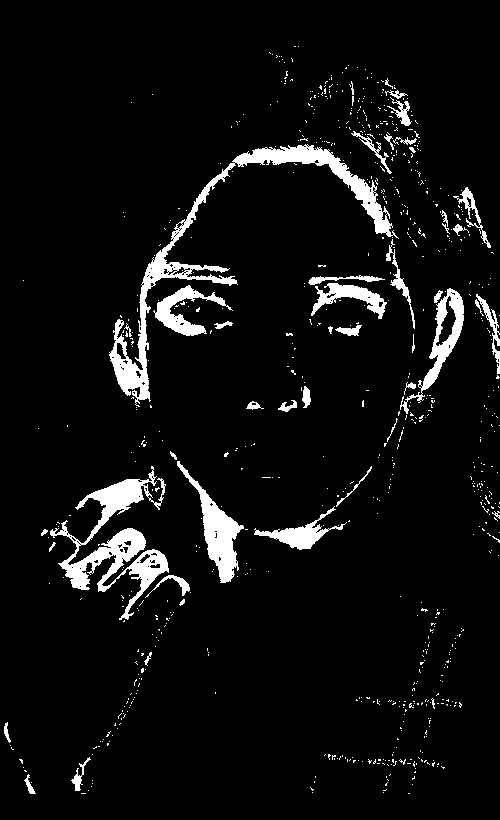

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


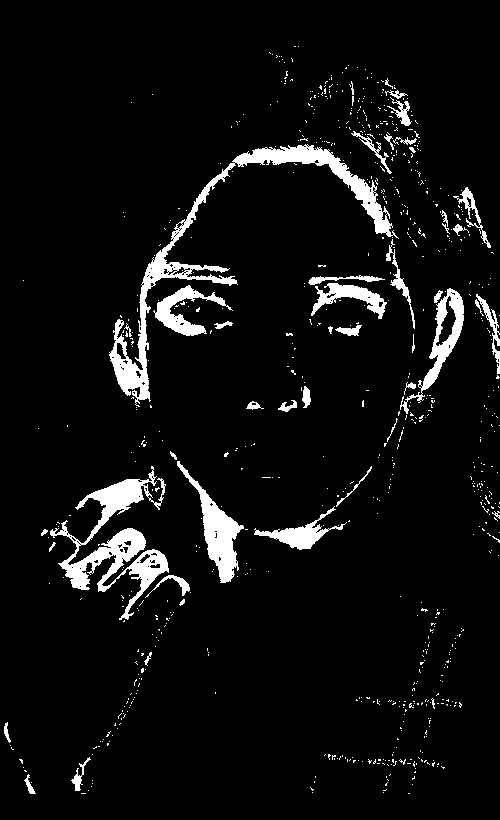

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


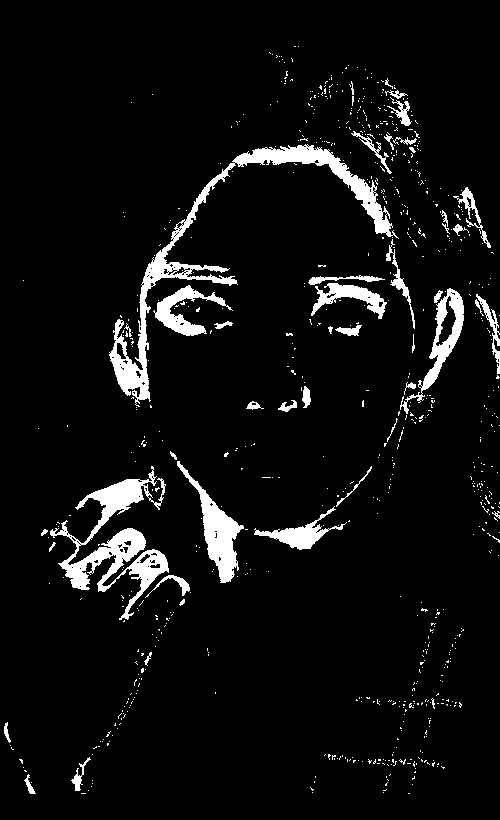

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


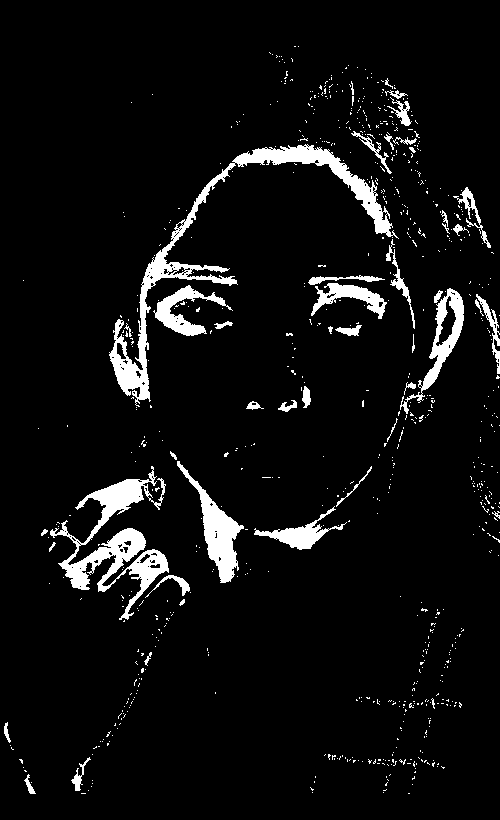

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


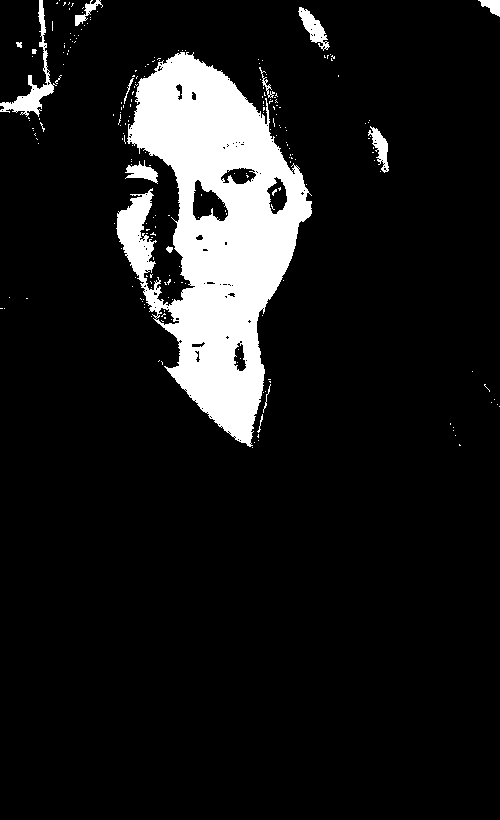

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


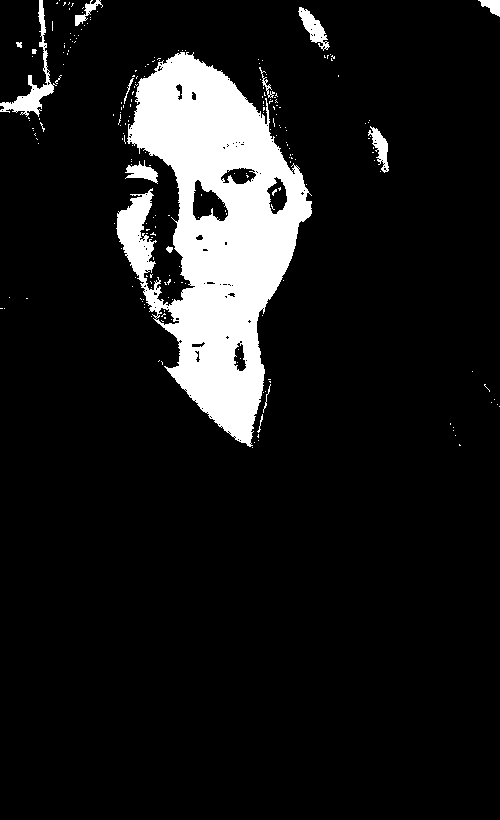

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


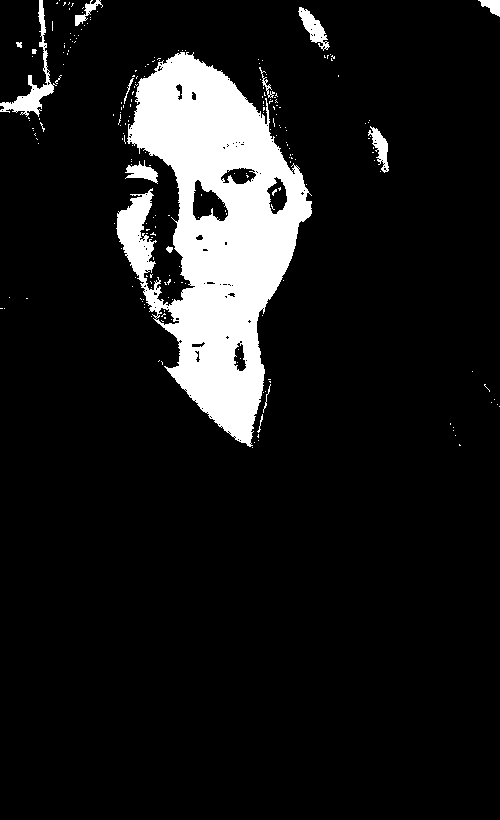

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


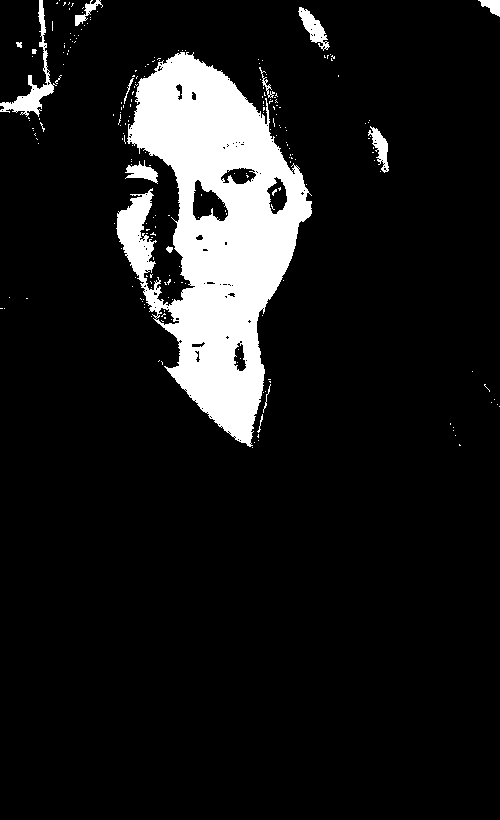

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


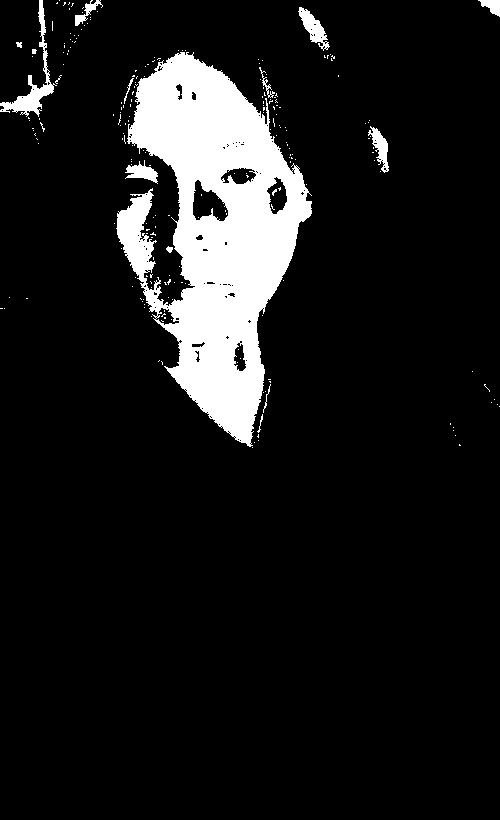

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


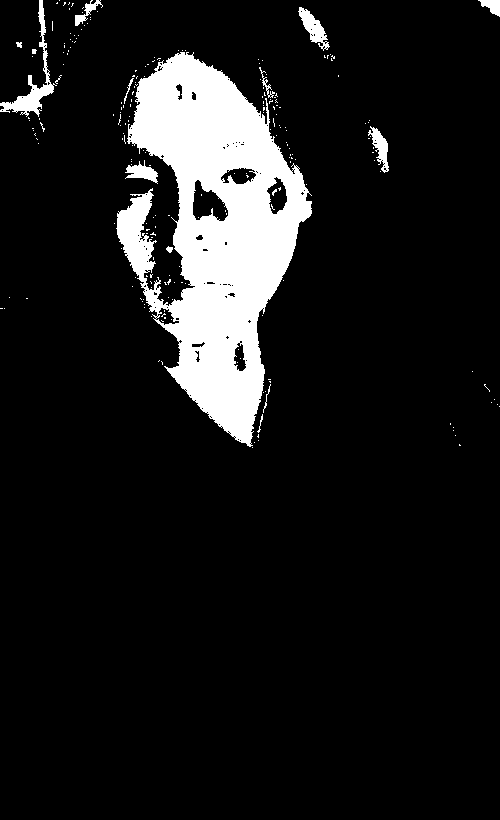

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


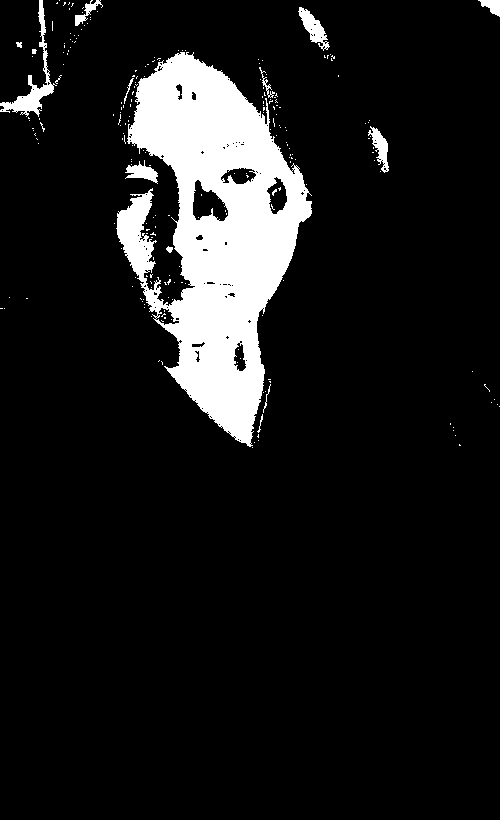

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


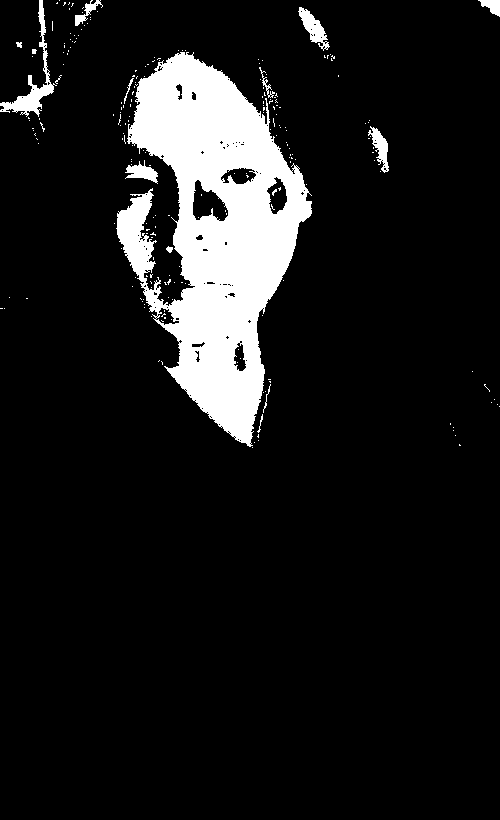

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


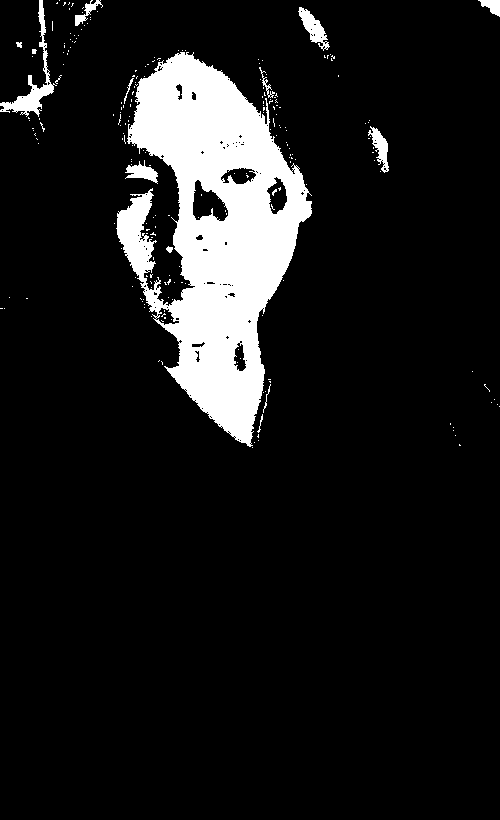

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


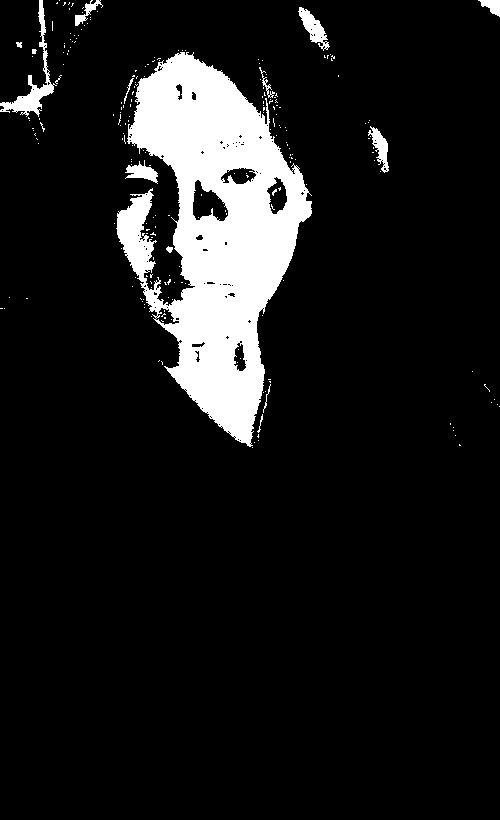

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


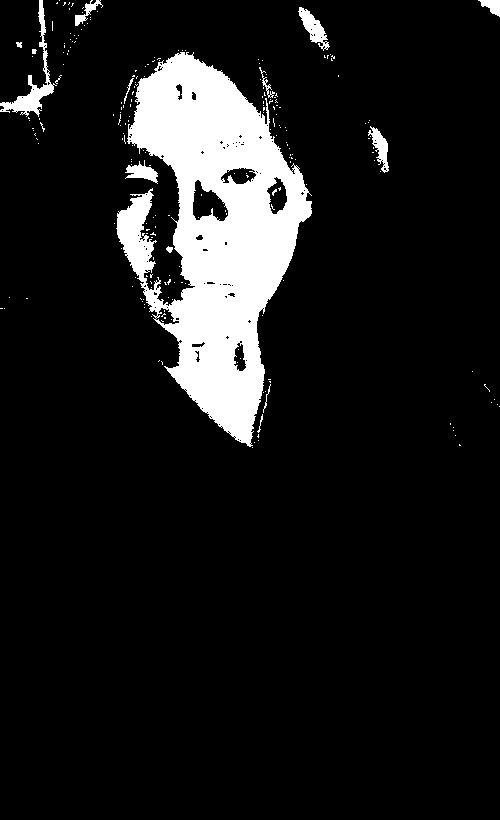

10% of the image is skin
closing mask of shape (820, 500)
Histogram remapping for reference image 'E' ...
1316
0.07598784194528875  %
max =  0.9027754431527047
0.1519756838905775  %
max =  0.9048278963945839
0.22796352583586624  %
max =  0.9027302648551823
0.303951367781155  %
max =  0.8974830038752879
0.3799392097264438  %
max =  0.901974067304931
0.4559270516717325  %
max =  0.995833309294443
0.5319148936170213  %
max =  0.9046538266062795
0.60790273556231  %
max =  0.9044937906790249
0.6838905775075987  %
max =  0.9039915934867504
0.7598784194528876  %
max =  0.904270469800908
0.8358662613981762  %
max =  0.9038496976243177
0.911854103343465  %
max =  0.8994520280712651
0.9878419452887538  %
max =  0.9777594786156502
1.0638297872340425  %
max =  0.8847133620907709
1.1398176291793314  %
max =  0.8992900215291552
1.21580547112462  %
max =  0.9961902397134791
1.2917933130699089  %
max =  0.9042525694515237
1.3677811550151975  %
max =  0.9999947007949462
1.4437689969604863  %
max =  0.9

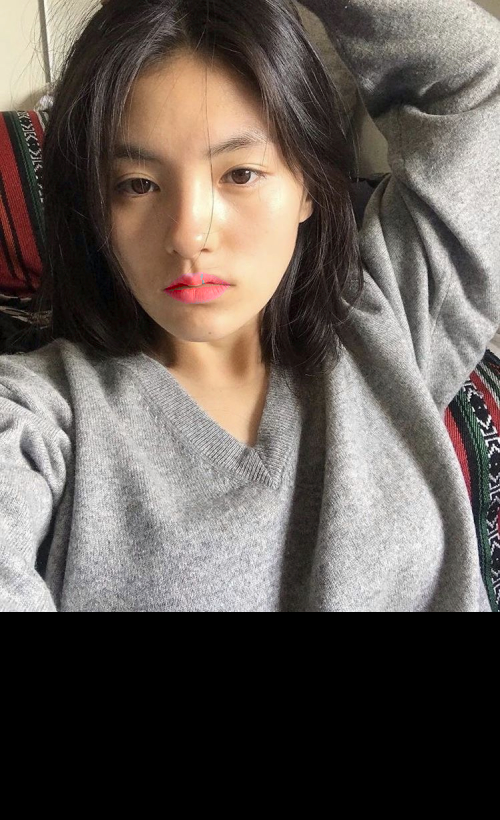

In [ ]:
subject = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg', 1)
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_15.jpg', 1)
subject = imutils.resize(subject, width=500)
target = imutils.resize(target, width=500)
sub, warped_tar = warp_target(subject, target)
lip_makeup(sub, warped_tar)

**overlay_blur.py - final step to reduce sharp edges of output: bước cuối cùng để giảm các cạnh sắc của đầu ra**

In [ ]:
def overlay(orig, makeup, mask):

    blur_mask = cv2.blur(mask, (20, 20))
    new = makeup.copy()
    for y in range(0, orig.shape[0]):
        for x in range(0, orig.shape[1]):
            w = blur_mask[y][x]/255
            if (w > 0.6):
                w = (w - 0.6) / 0.4
            else:
                w = 0
            new[y][x] = makeup[y][x]*w + orig[y][x]*(1 - w)


    return new

bigger target
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


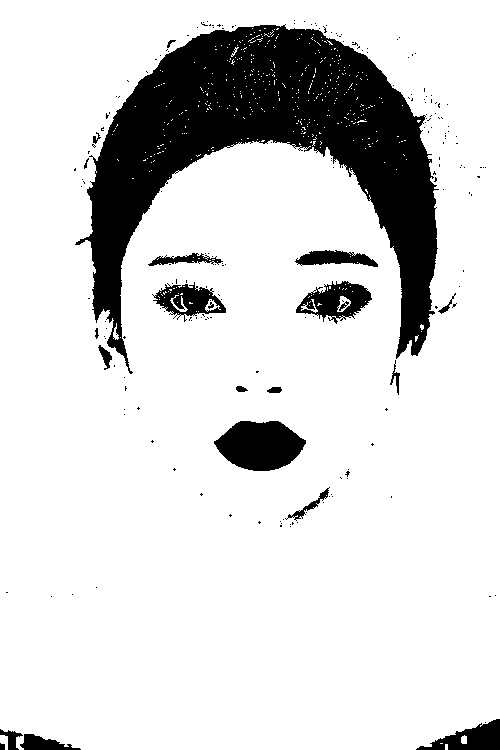

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


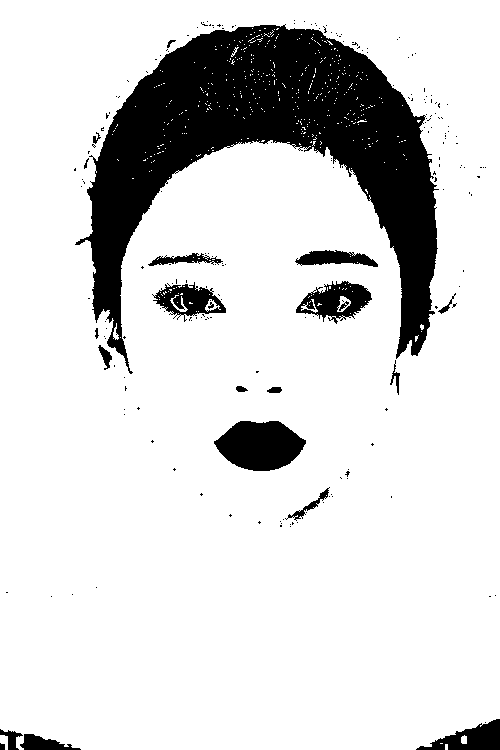

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


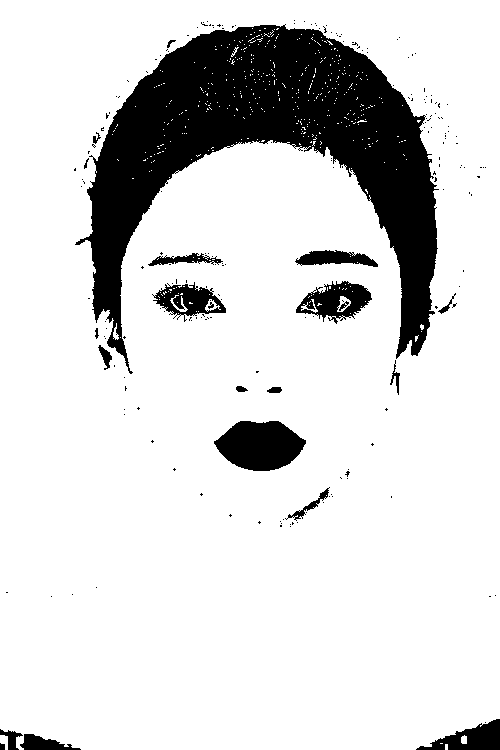

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


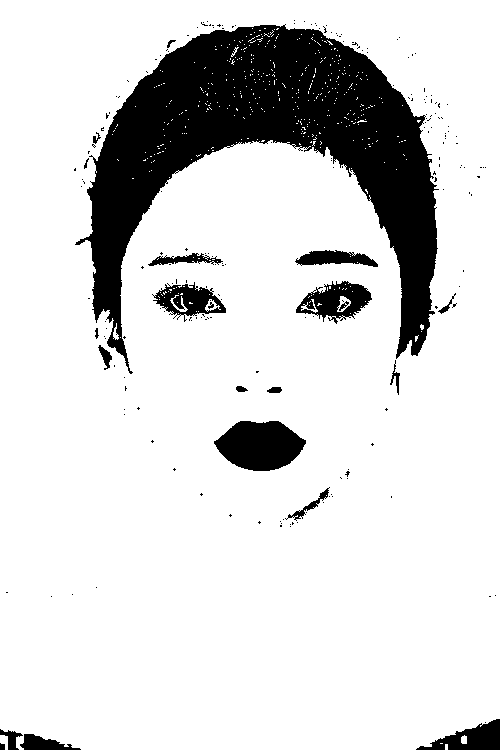

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


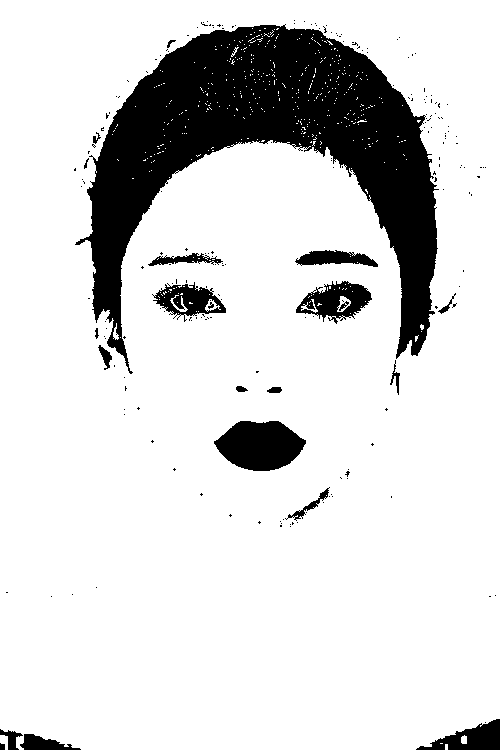

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


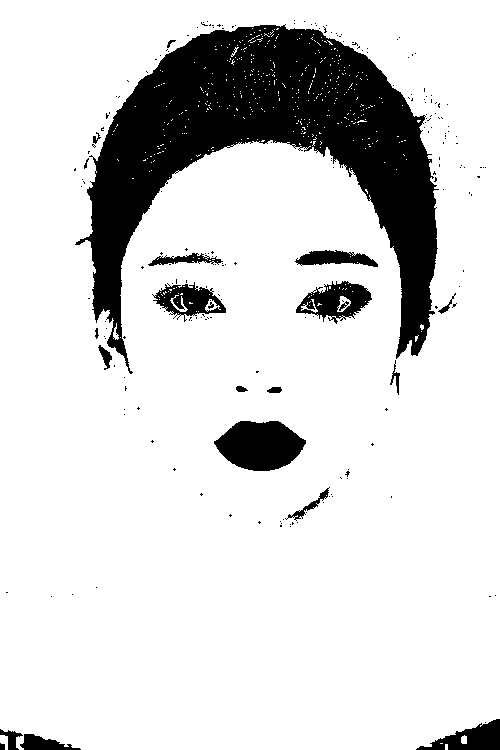

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


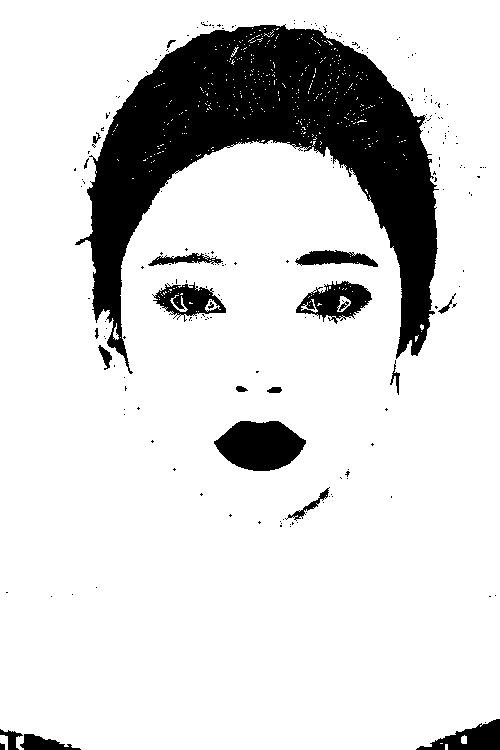

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


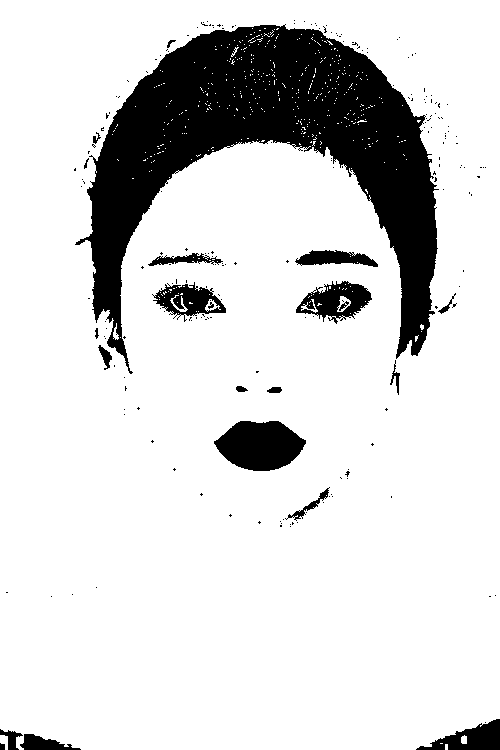

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


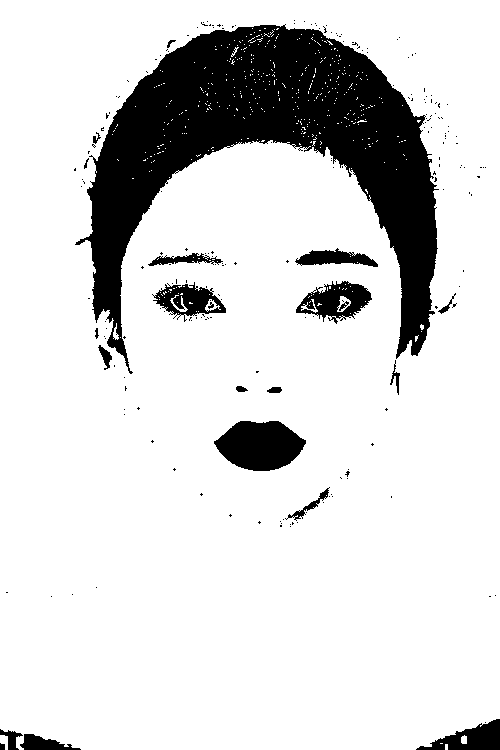

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


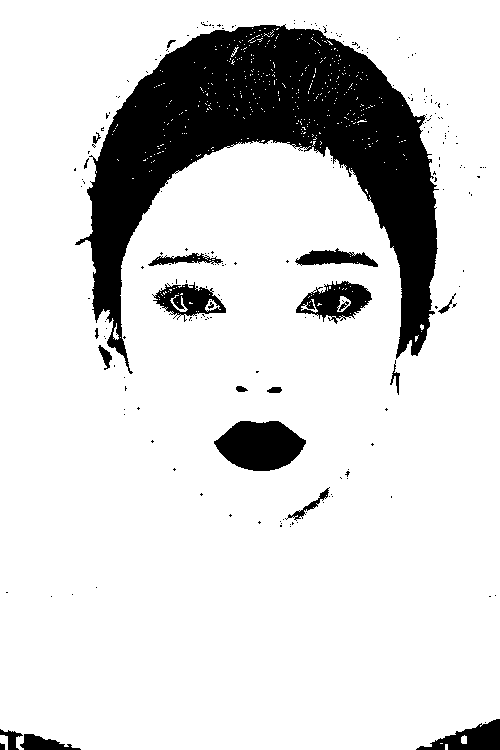

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


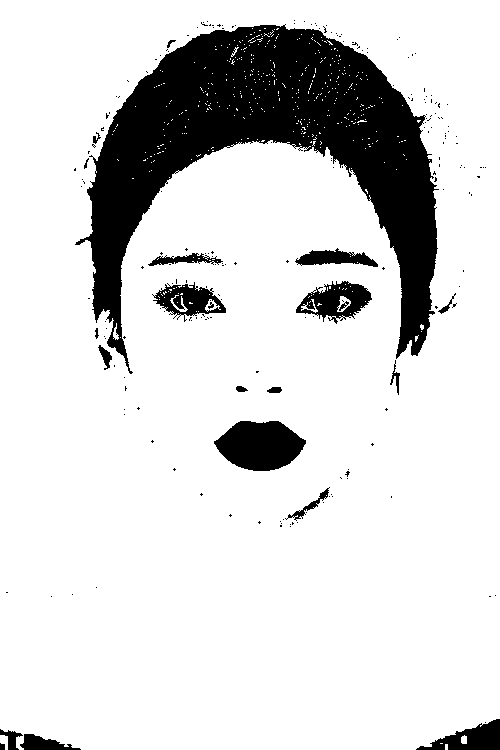

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


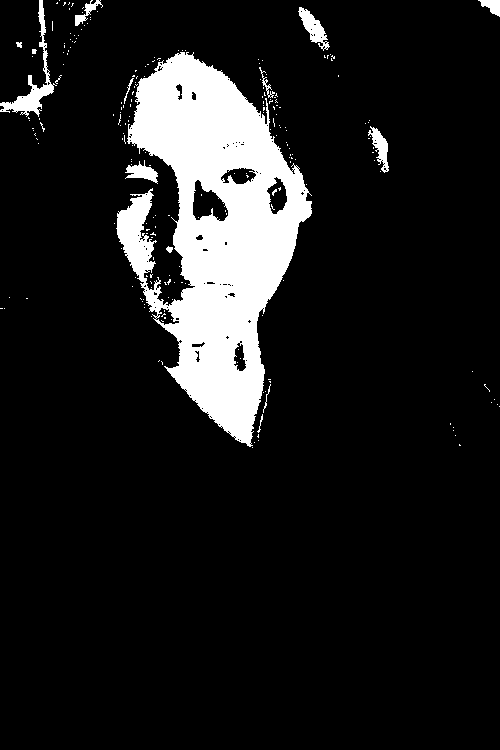

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


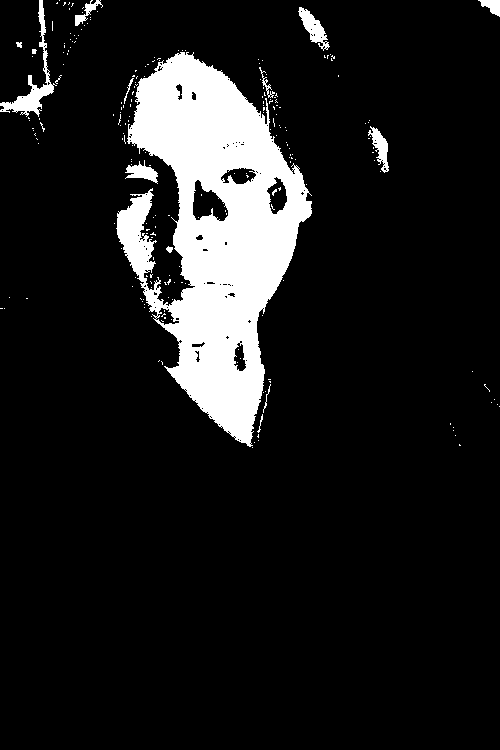

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


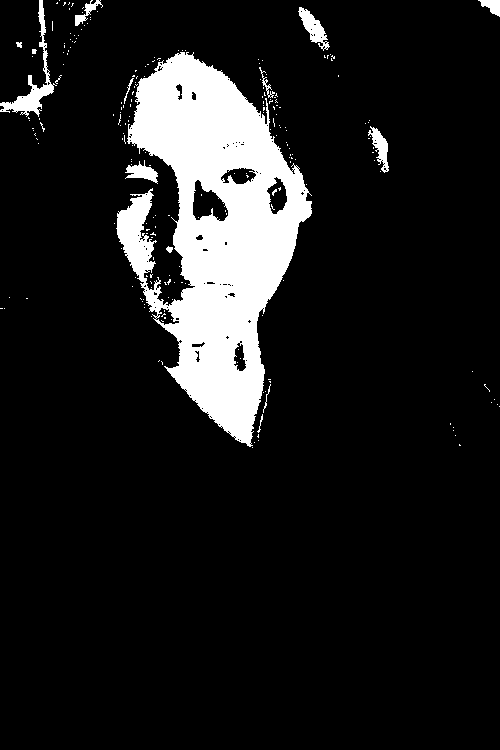

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


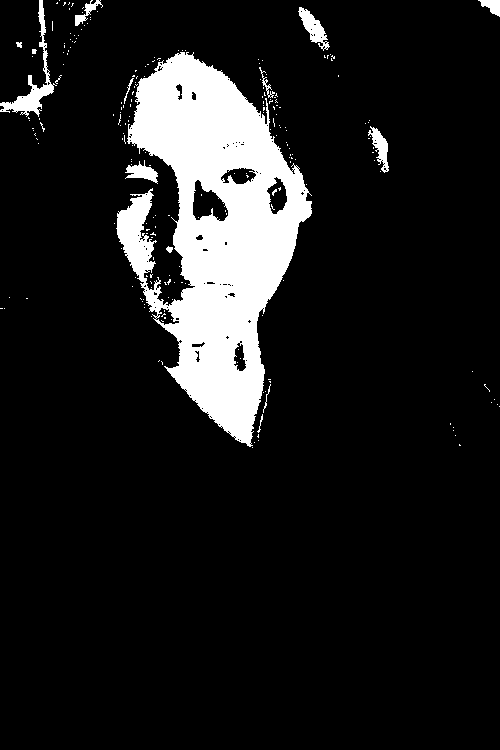

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


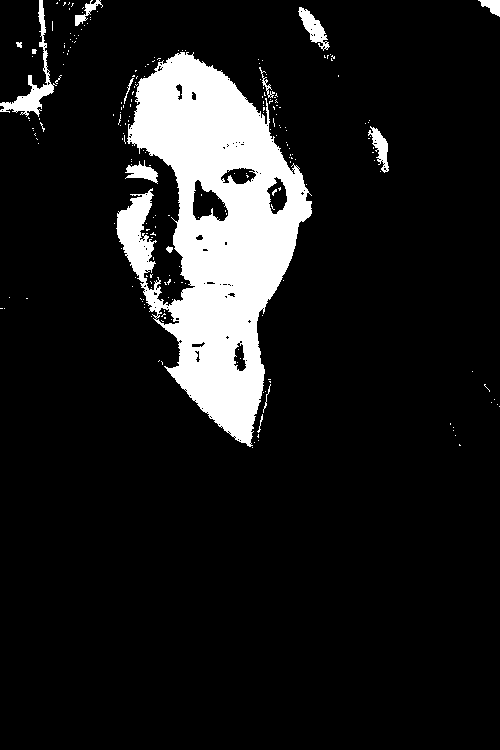

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


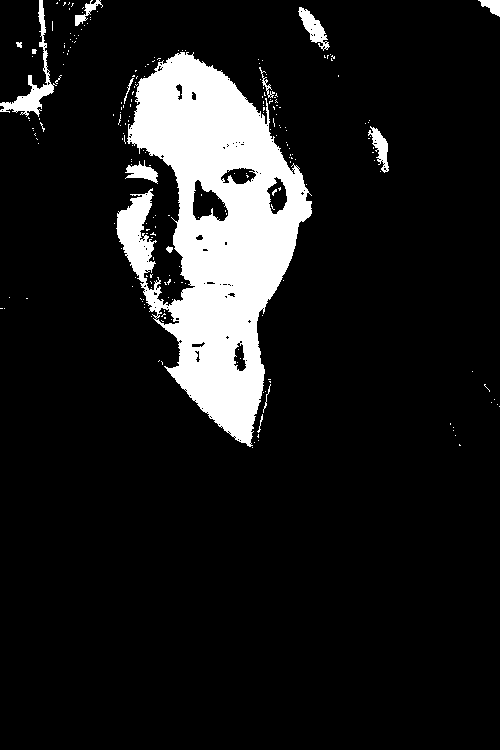

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


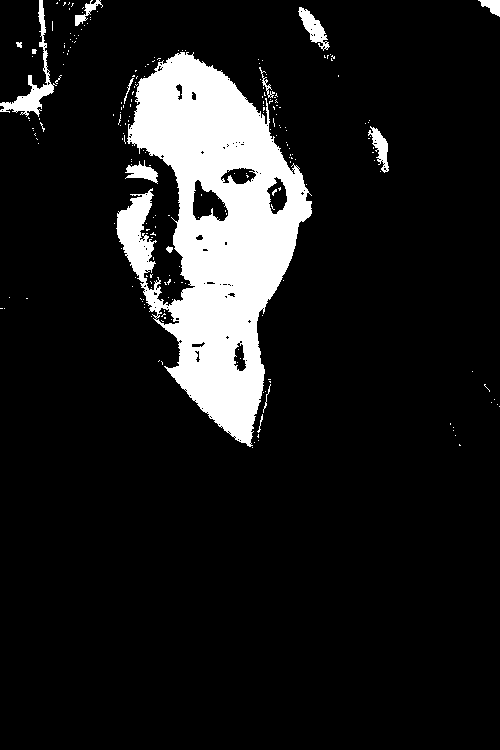

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


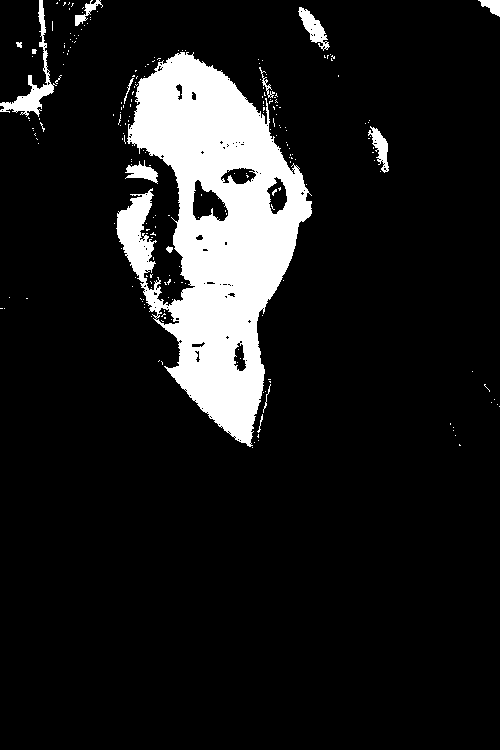

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


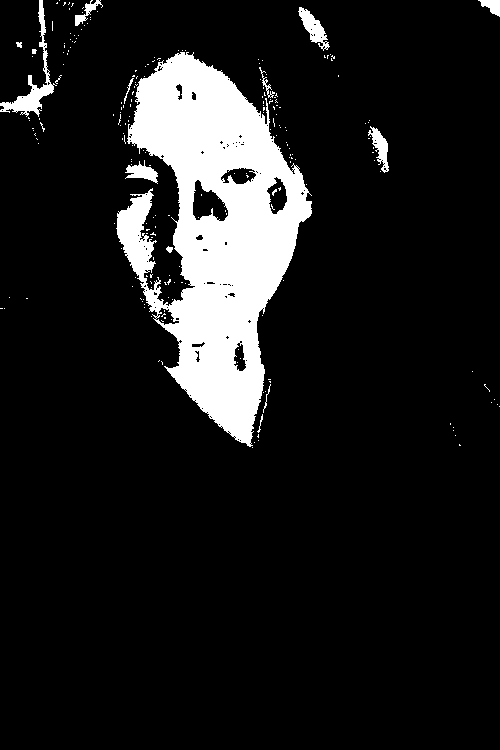

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


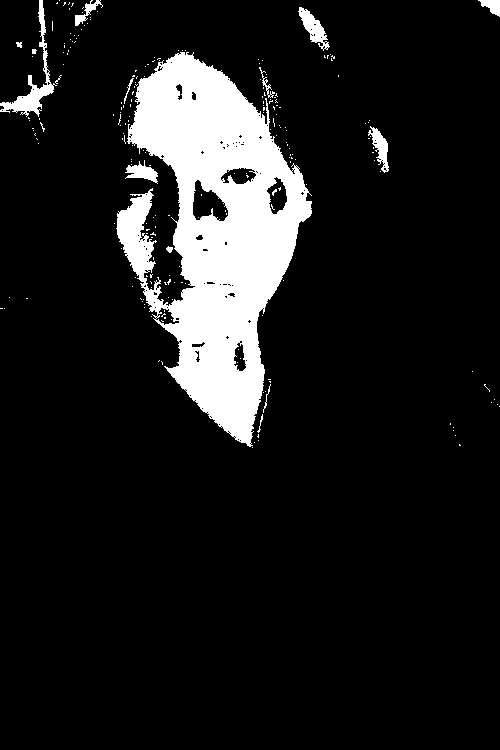

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


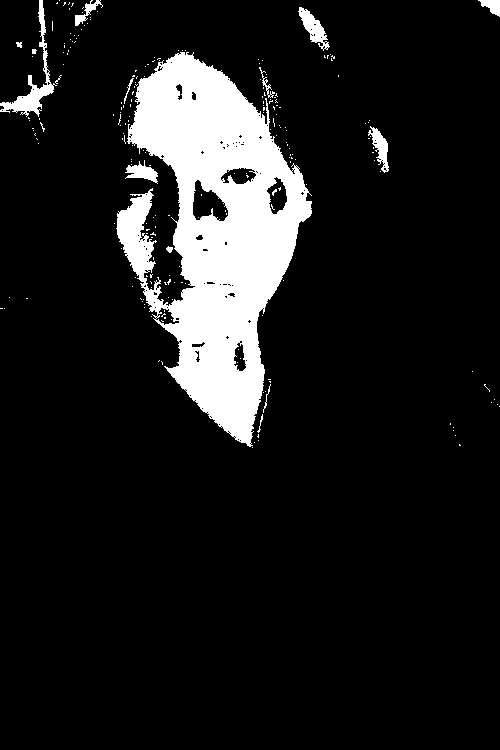

11% of the image is skin
closing mask of shape (750, 500)


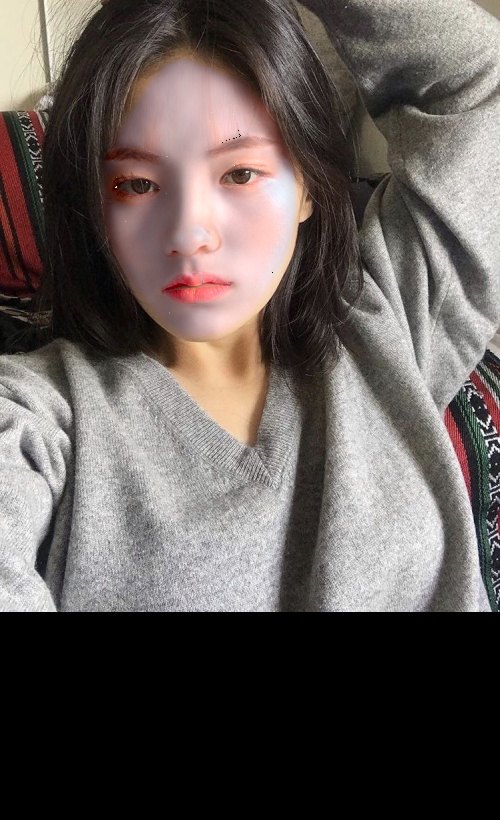

In [ ]:
subject = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg', 1)
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_2.jpg', 1)
subject = imutils.resize(subject, width=500)
target = imutils.resize(target, width=500)
sub, warped_tar = warp_target(subject, target)
zeros = np.zeros(warped_tar.shape, dtype=warped_tar.dtype)
ones = np.ones(warped_tar.shape, dtype=warped_tar.dtype)
face_mask = np.where(warped_tar==[0,0,0], zeros, ones*255)
res = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/res.jpg', 1)

new = overlay(subject, res, face_mask[:,:,0])
# cv2.imshow('new', new)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2_imshow(new)

**makeup.py**

In [ ]:
def decompose(img):
    base = cv2.bilateralFilter(img, 9, 75,75)
    return base, img-base

In [ ]:

def warp_target(subject, target):

    if(target.shape[0]>subject.shape[0]):
        print('bigger target')
        new_subject = np.zeros((target.shape[0]-subject.shape[0],subject.shape[1],3), dtype=subject.dtype)
        subject = np.vstack((subject, new_subject))
    else:
        print('bigger subject')
        #resizing target
        new_target = np.zeros((subject.shape[0]-target.shape[0],target.shape[1],3), dtype=target.dtype)
        target = np.vstack((target, new_target))

    if(subject.shape[0]%2!=0):
        zero_layer = np.zeros((1, target.shape[1],3), dtype=target.dtype)
        target = np.vstack((target, zero_layer))
        subject = np.vstack((subject, zero_layer))

    #cv2.imshow('s', subject)
    #cv2.imshow('t', target)
    #cv2.waitKey(0)

    warped_target = warp(target, subject)
    #cv2.imshow('new', warped_target)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    #cv2_imshow(warped_target)

    return subject, warped_target

bigger target
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


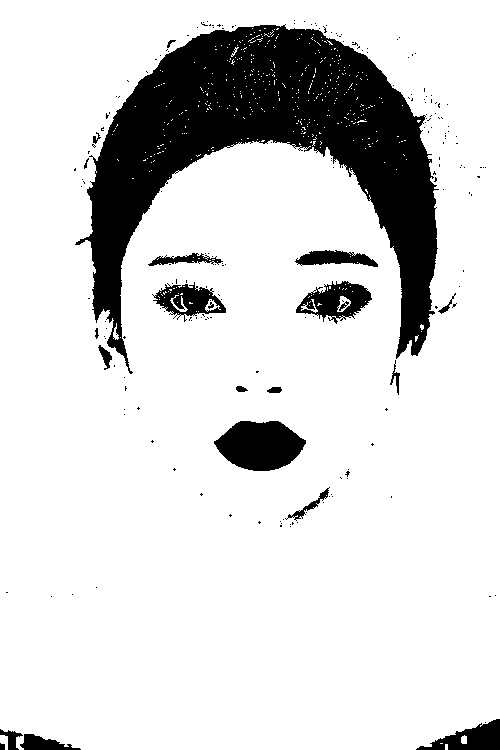

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


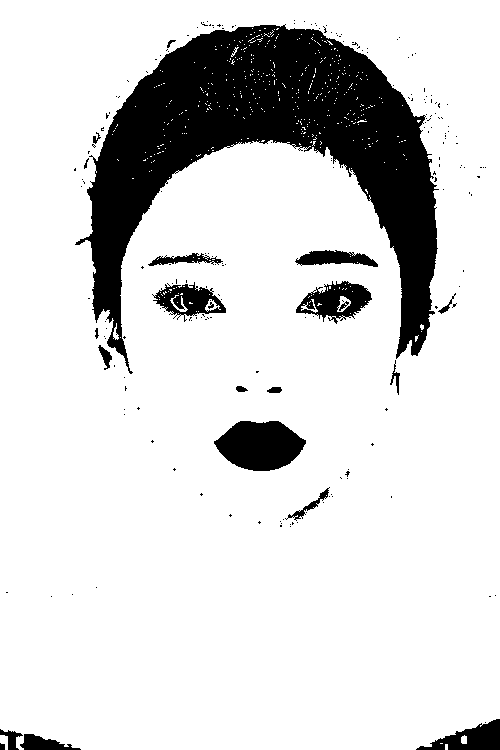

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


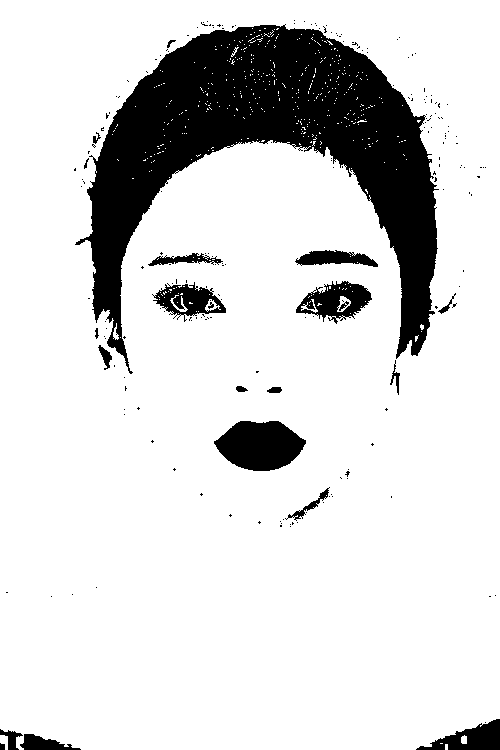

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


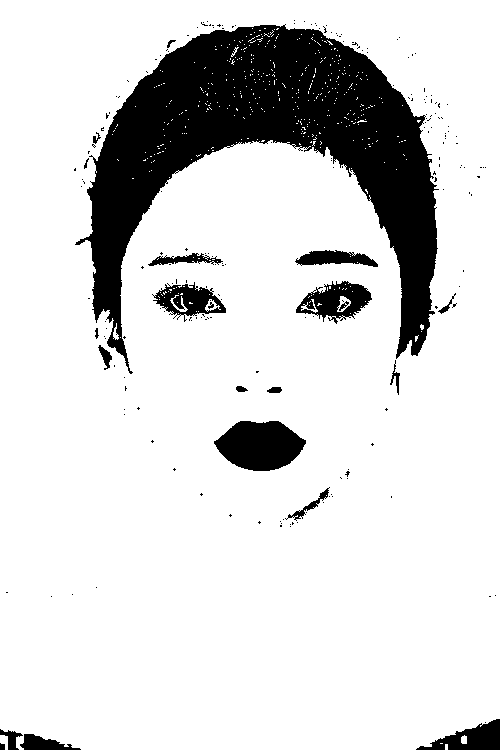

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


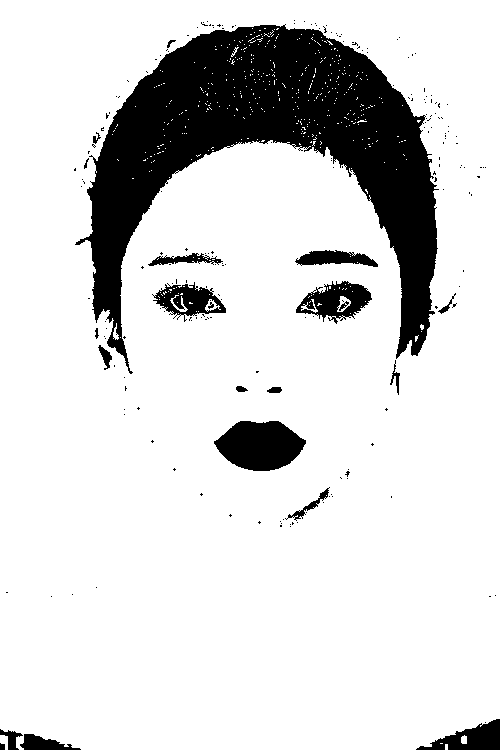

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


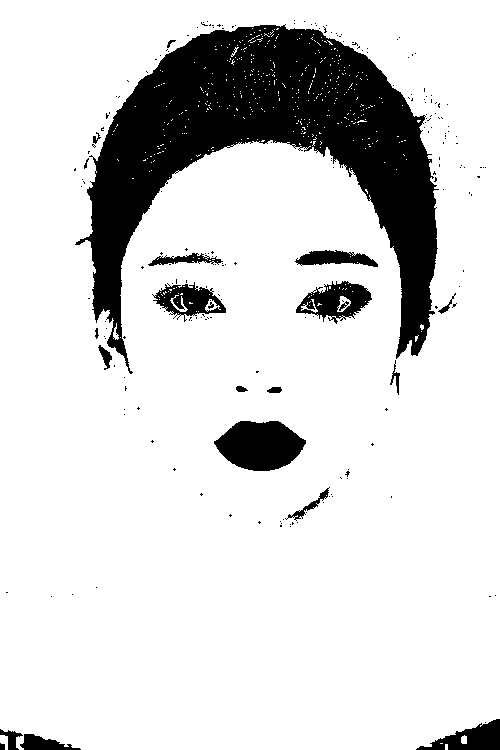

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


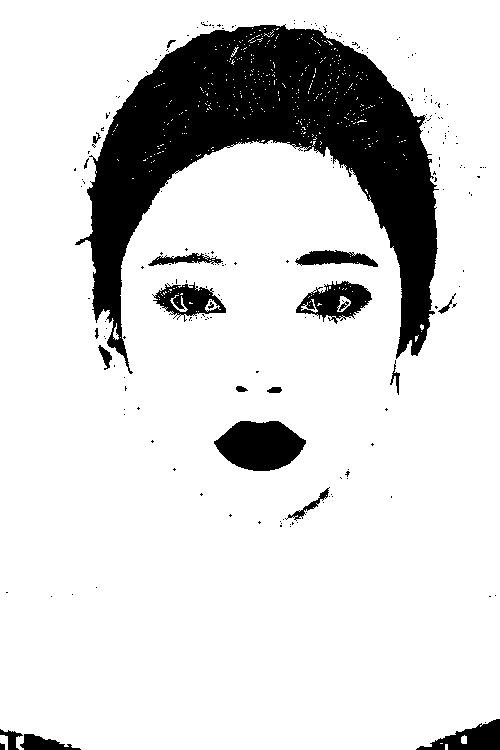

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


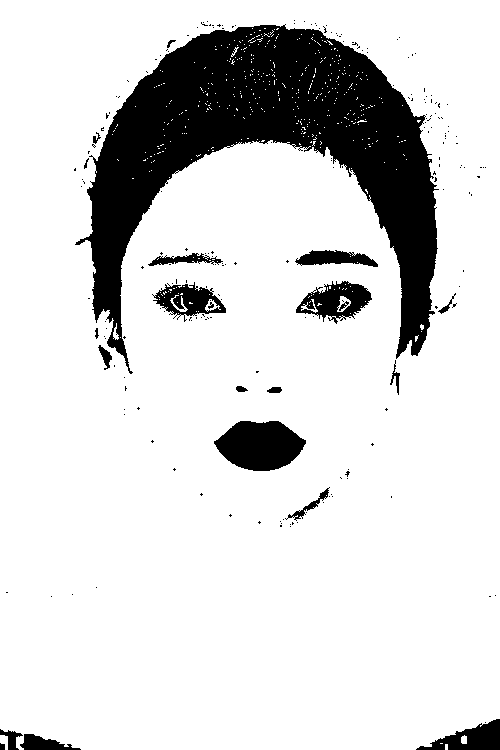

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


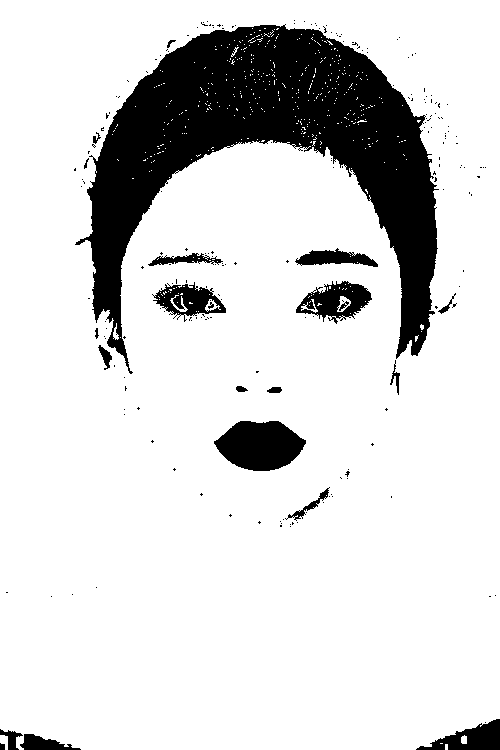

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


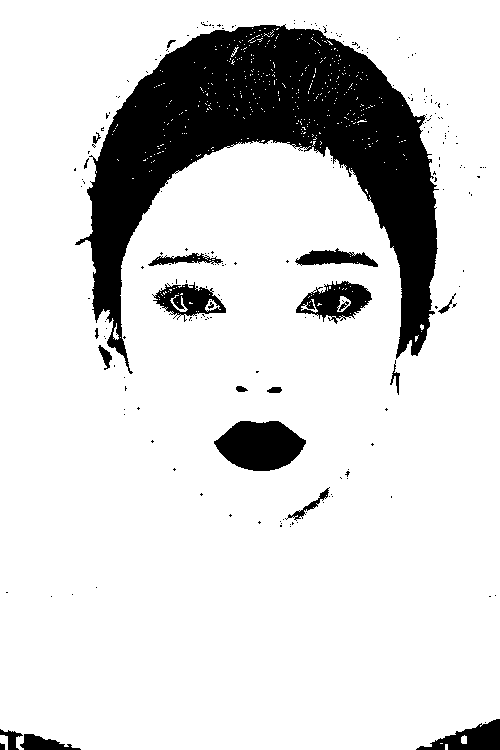

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


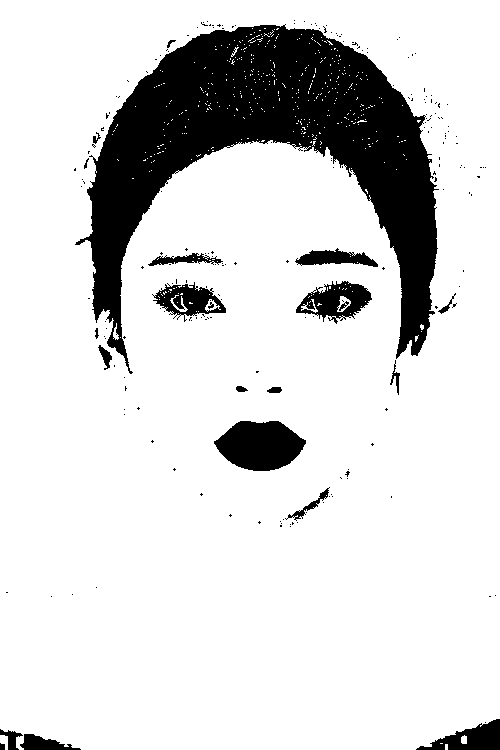

84% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


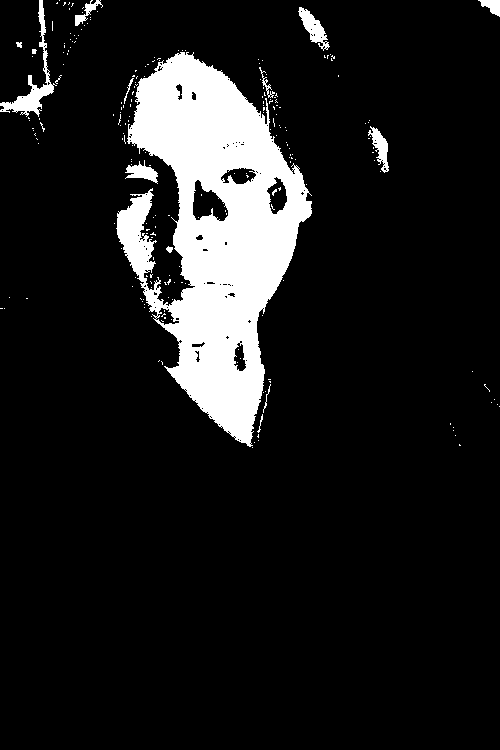

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


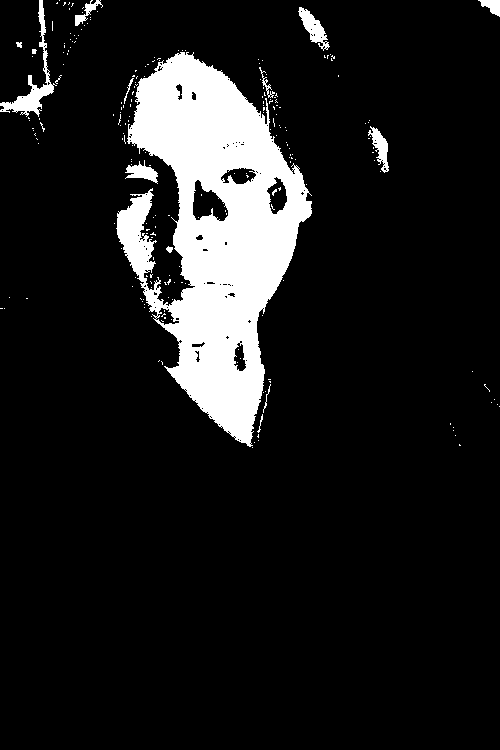

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


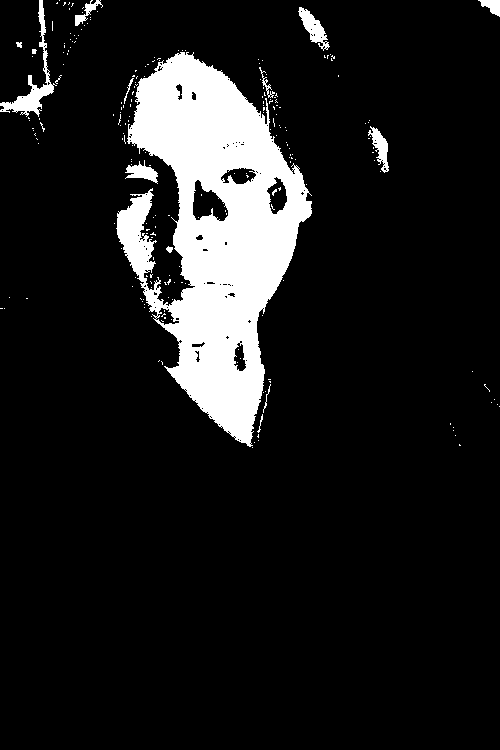

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


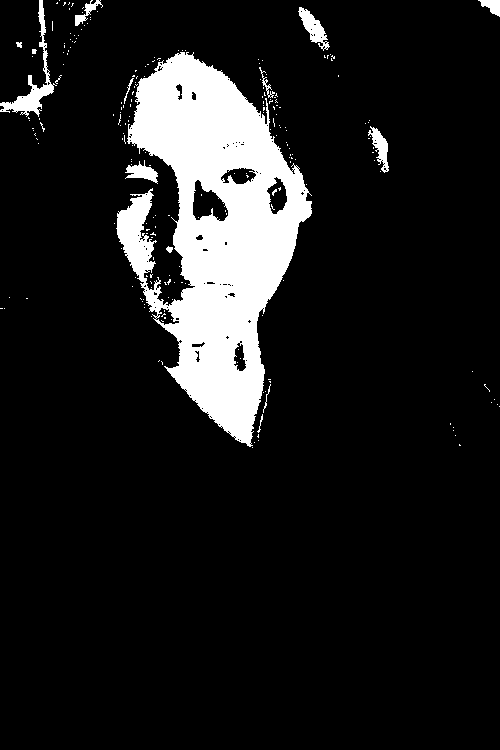

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


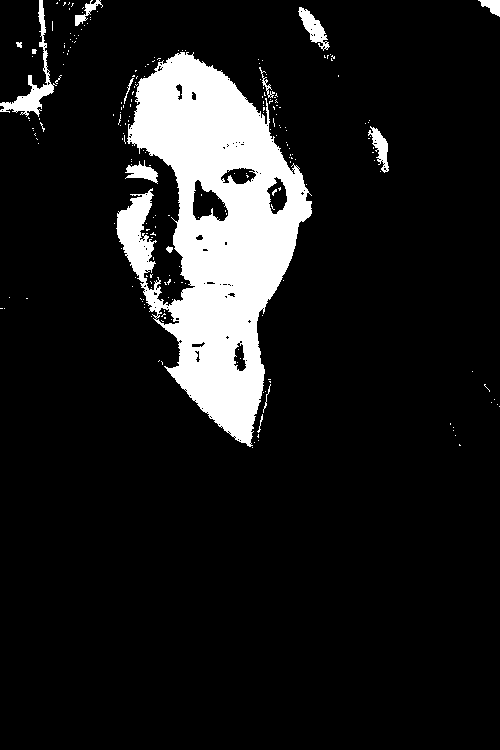

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


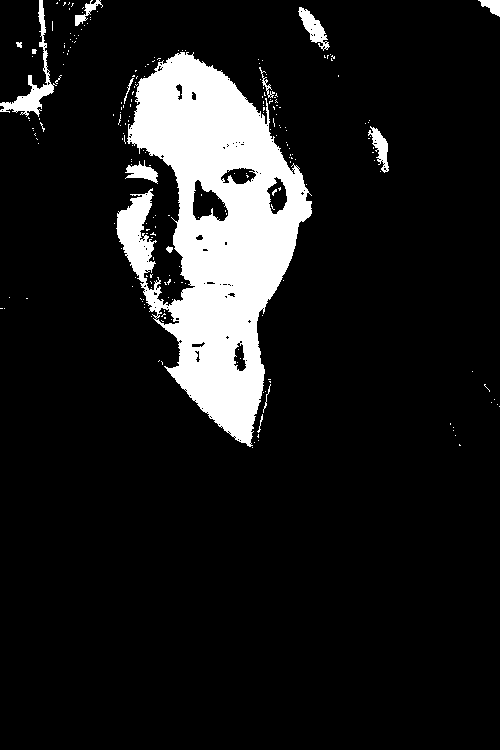

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


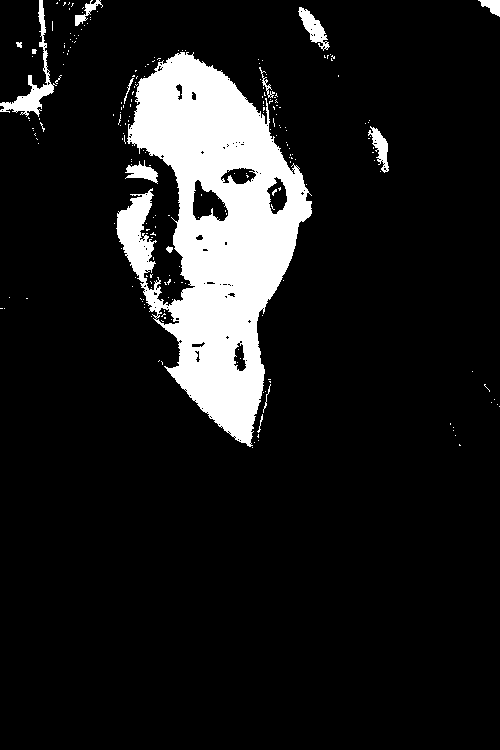

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


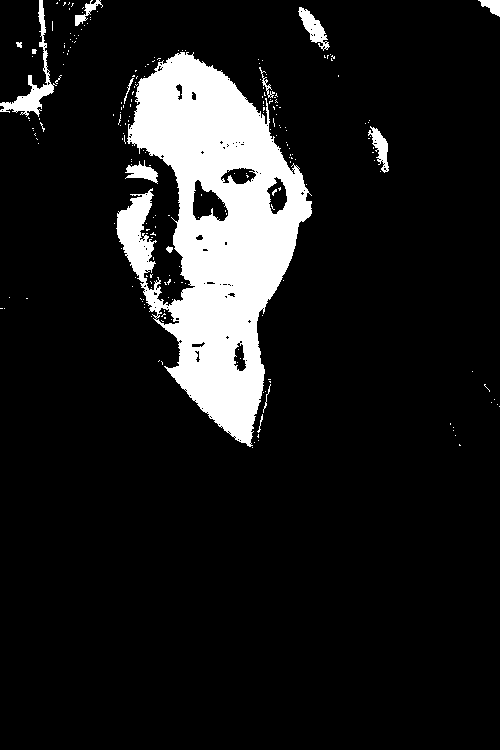

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


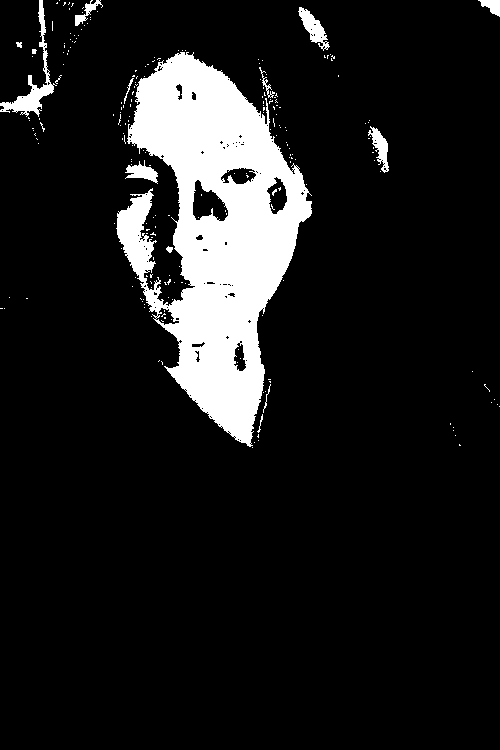

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


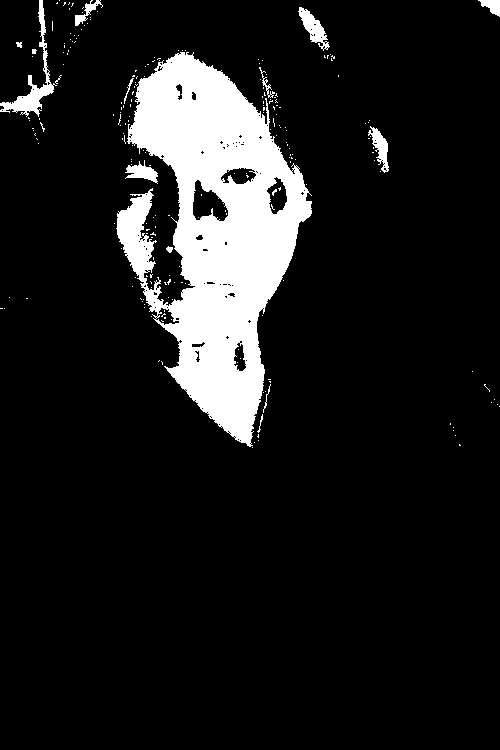

11% of the image is skin
closing mask of shape (750, 500)
processing image of shape (750, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


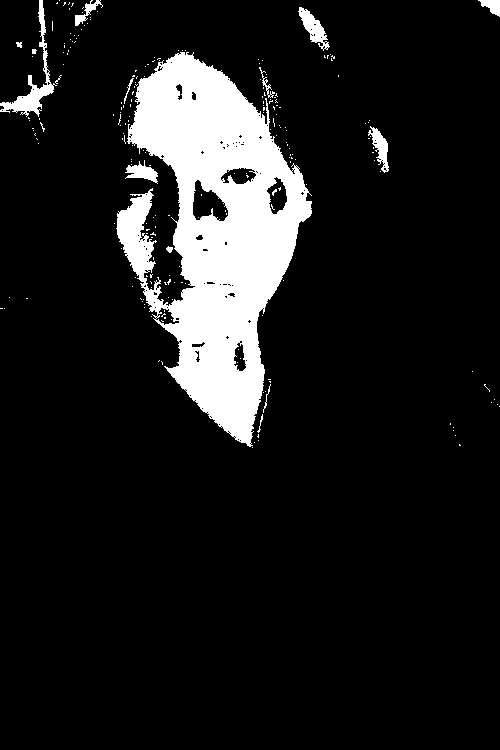

11% of the image is skin
closing mask of shape (750, 500)


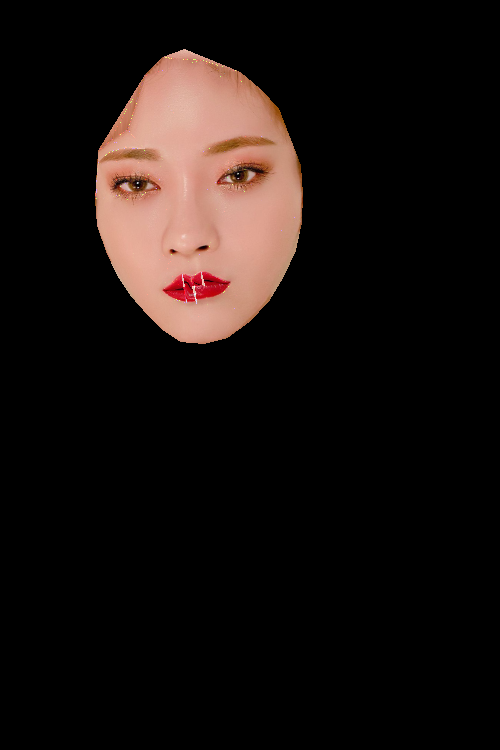

In [ ]:
subject = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg')
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_2.jpg')
subject = imutils.resize(subject, width=500)
target = imutils.resize(target, width=500)
warp_target(subject, target)

In [ ]:
def apply_makeup(subject, warped_target):
    zeros = np.zeros(warped_target.shape, dtype=warped_target.dtype)
    ones = np.ones(warped_target.shape, dtype=warped_target.dtype)
    face_mask = np.where(warped_target==[0,0,0], zeros, ones*255)
    # cv2.imshow('mask', face_mask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    cv2_imshow(face_mask)

    sub_lab = cv2.cvtColor(subject, cv2.COLOR_BGR2LAB)
    tar_lab = cv2.cvtColor(warped_target, cv2.COLOR_BGR2LAB)

    sl, sa, sb = cv2.split(sub_lab)
    tl, ta, tb = cv2.split(tar_lab)

    face_struct_s, skin_detail_s = decompose(sl)
    face_struct_t, skin_detail_t = decompose(tl)

    #color transfer
    gamma = .8
    '''
    type = sa.dtype
    sa.dtype = float
    ta.dtype = float
    sb.dtype = float
    tb.dtype = float
    '''
    type = sa.dtype
    ra = np.where(True, sa*(1-gamma)+ta*gamma, zeros[:,:,0])
    rb = np.where(True, sb*(1-gamma)+tb*gamma, zeros[:,:,0])
    ra = ra.astype(type)
    rb = rb.astype(type)
    #print(ra.shape)
    ra = cv2.bitwise_and(ra,ra,mask = face_mask[:,:,0])
    rb = cv2.bitwise_and(rb,rb,mask = face_mask[:,:,0])



    #skin-detail transfer
    gammaI = 0
    gammaE = 1
    skin_detail_r = np.where(True, skin_detail_s*gammaI + skin_detail_t*gammaE, zeros[:,:,0])
    skin_detail_r = skin_detail_r.astype(type)


    #Work on the base layer
    fp_mask = find_mask(subject, True)
    src_gauss = cv2.pyrDown(face_struct_s)
    src_lapla = face_struct_s - cv2.pyrUp(src_gauss)
    dst_gauss = cv2.pyrDown(face_struct_t)
    dst_lapla = face_struct_t - cv2.pyrUp(dst_gauss)
    face_struct_r = np.where(face_mask[:,:,0]==0, face_struct_s, dst_lapla + cv2.pyrUp(src_gauss))
    #cv2.imshow('transfering target', face_struct_r)
    cv2_imshow(face_struct_r)
    #cv2.waitKey(0)
    face_struct_r = np.where(fp_mask[:,:,0]==255, face_struct_s, face_struct_r)

    #cv2.imshow('mask', fp_mask)
    #cv2.imshow('transfering target', face_struct_r)
    #cv2.imshow('keeping src', face_struct_s)
    #cv2.imshow('diff', face_struct_s - face_struct_r)
    #cv2.waitKey(0)

    cv2_imshow(fp_mask)
    cv2_imshow(face_struct_r)
    cv2_imshow(face_struct_s)
    cv2_imshow(face_struct_s - face_struct_r)

    rl = face_struct_r+skin_detail_r
    rl = cv2.bitwise_and(rl,rl,mask = face_mask[:,:,0])

    res_lab = cv2.merge((rl, ra, rb))
    res = cv2.cvtColor(res_lab, cv2.COLOR_LAB2BGR)

    fp_mask = find_mask(subject, False)
    res = cv2.bitwise_and(res,res,mask = face_mask[:,:,0])
    res = np.where(face_mask==[0,0,0], subject, res)
    res = np.where(fp_mask==[255,255,255], subject, res)


    #apply lip makeup
    M, lip_map = lip_makeup(subject, warped_target)
    res = np.where(lip_map==[255,255,255], M, res)

    # cv2.imshow('old', res)
    # cv2.waitKey(0)
    cv2_imshow(res)

    res = overlay(subject, res, face_mask[:,:,0])
    
    cv2_imshow(res)
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/res.jpg', res)

bigger target
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


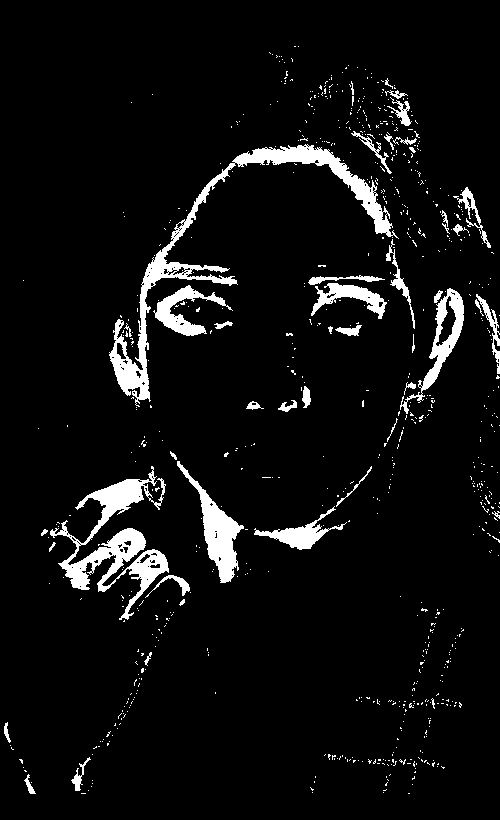

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


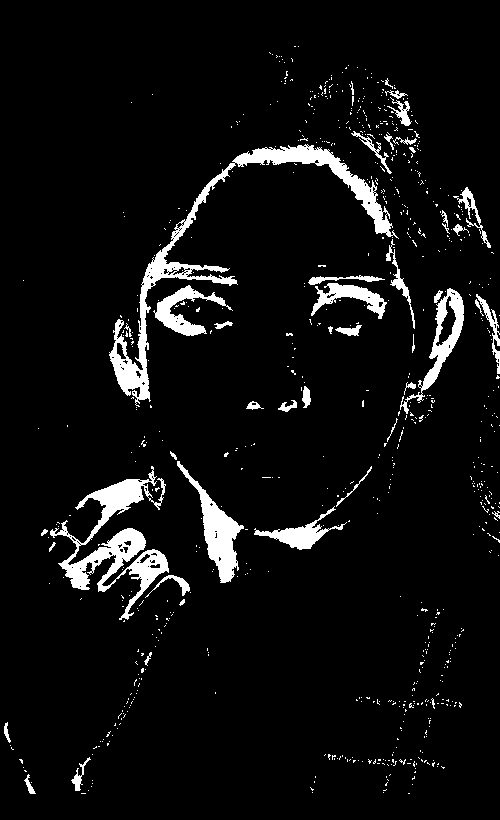

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


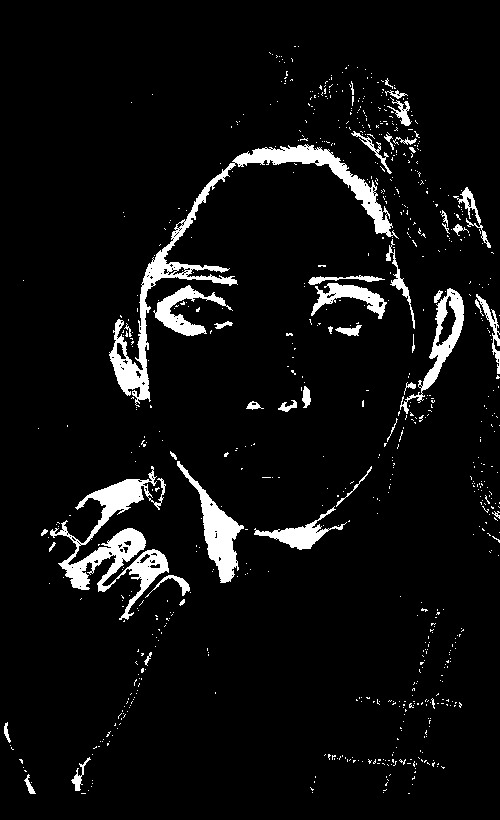

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


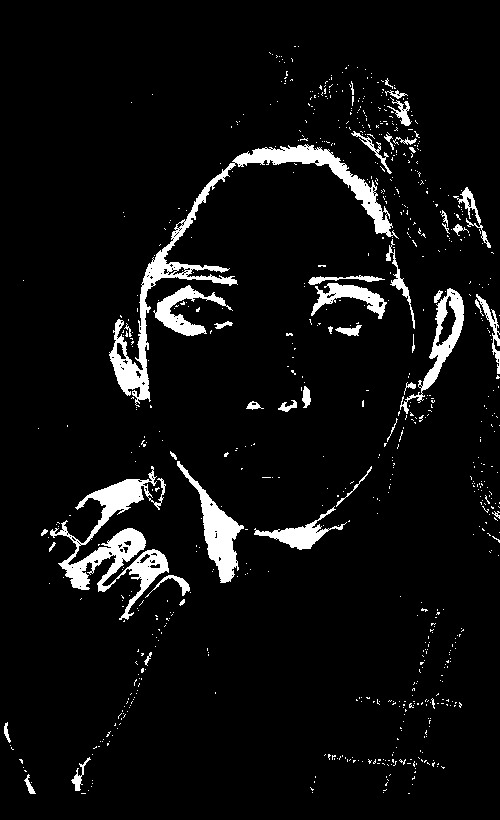

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


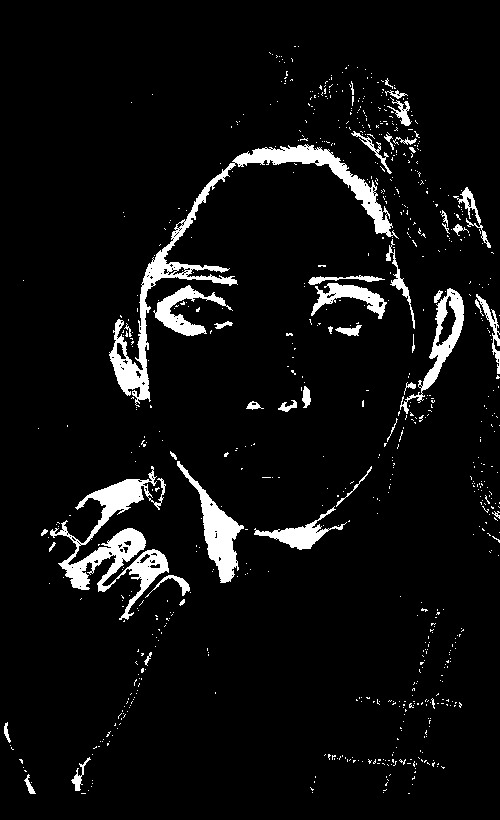

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


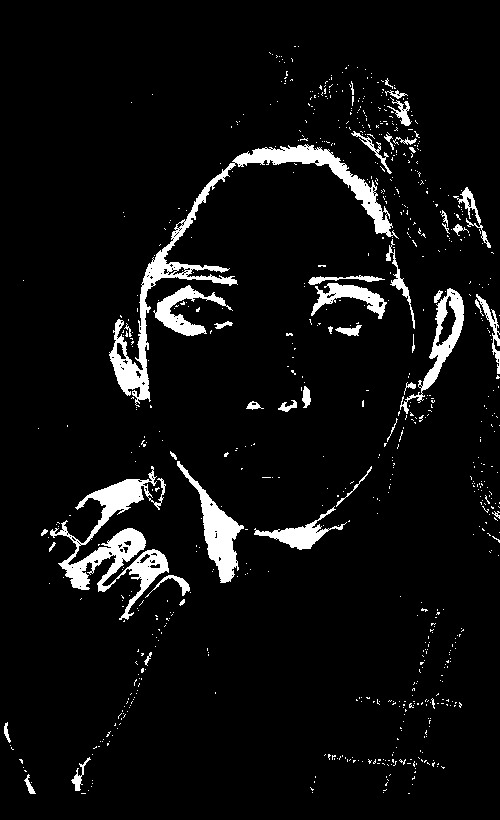

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


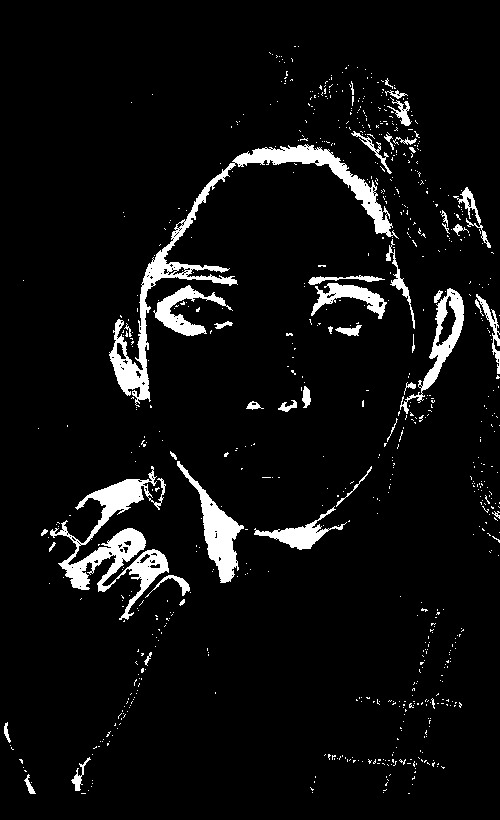

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


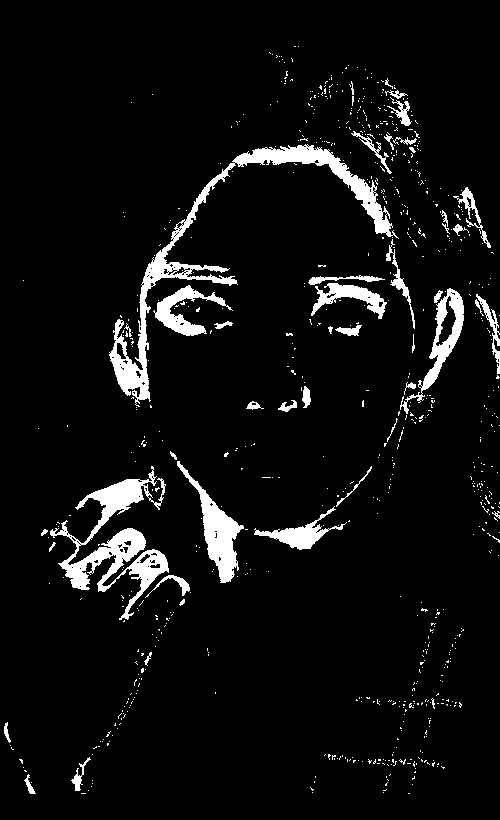

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


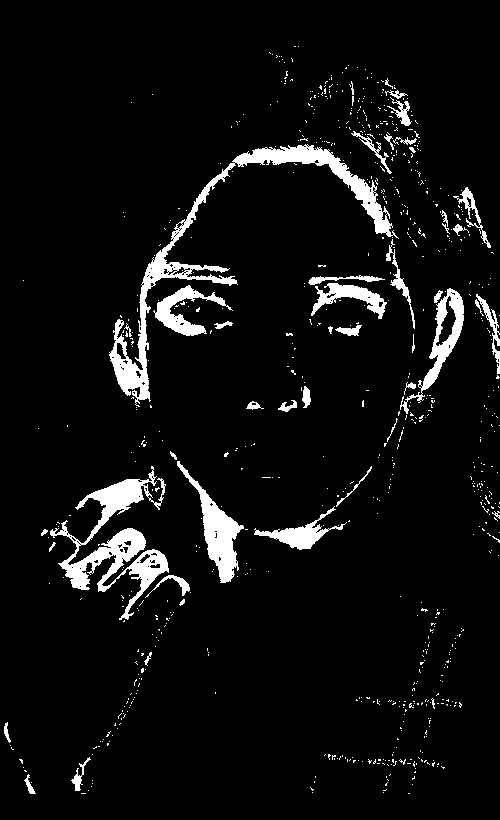

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


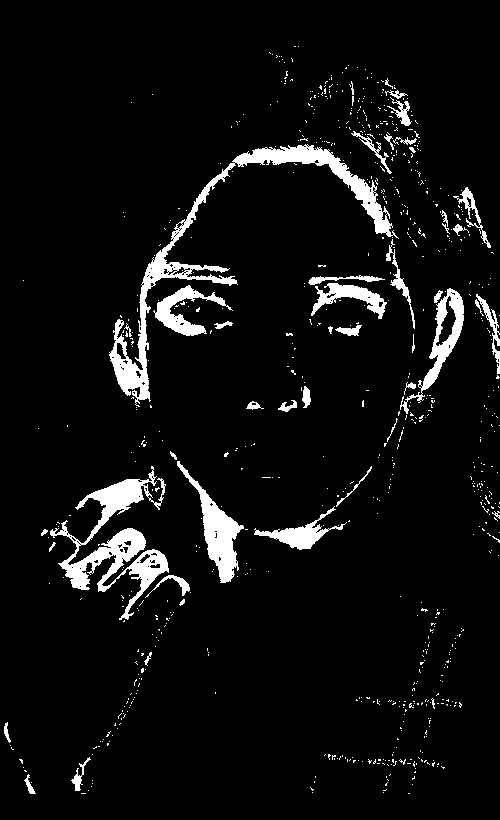

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


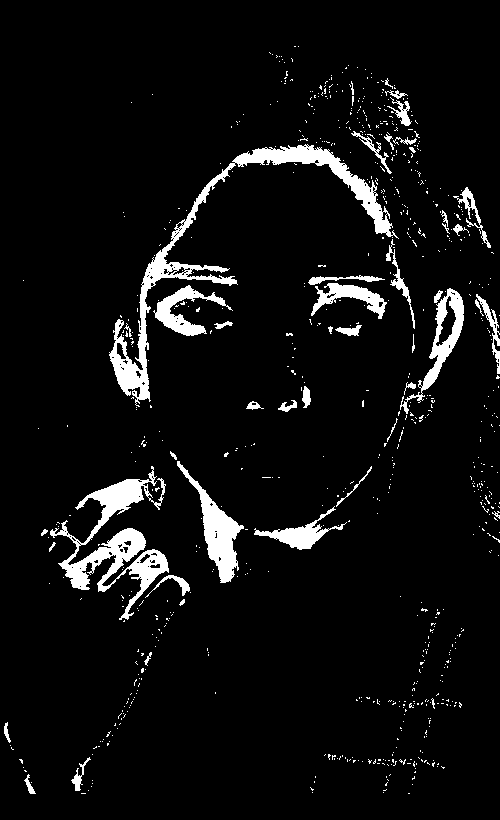

6% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


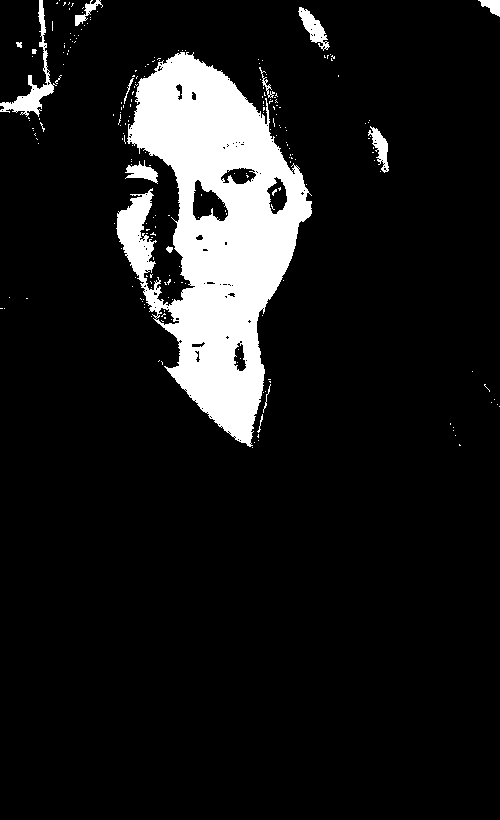

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


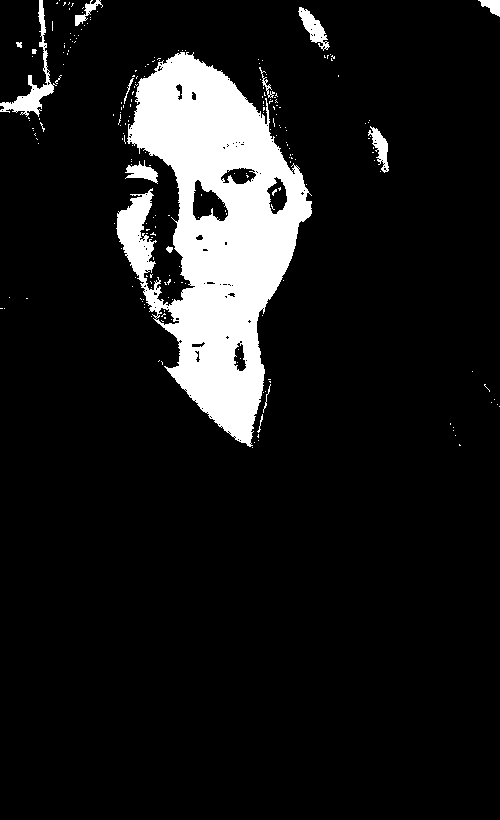

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


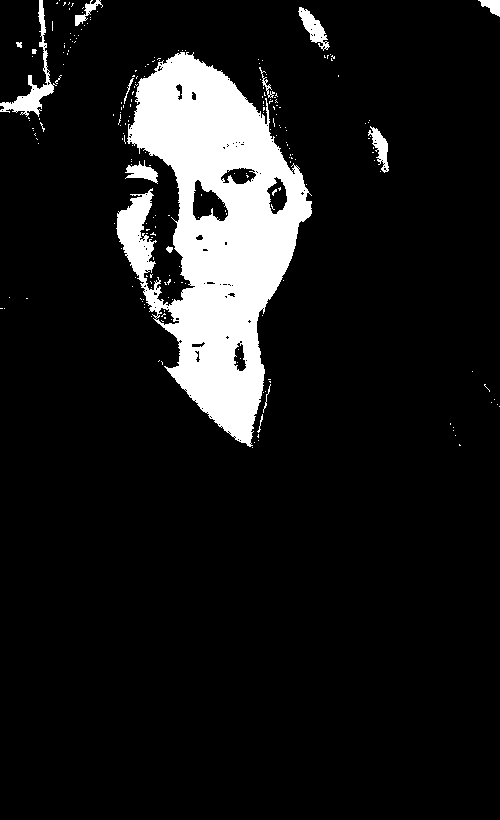

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


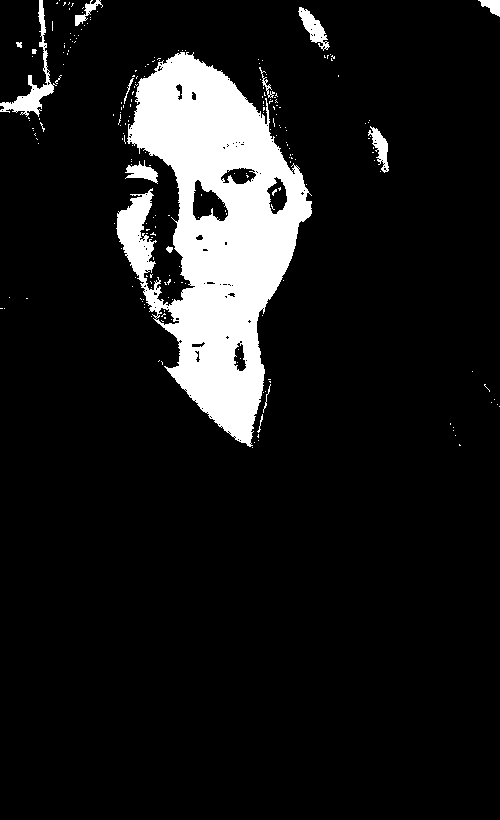

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


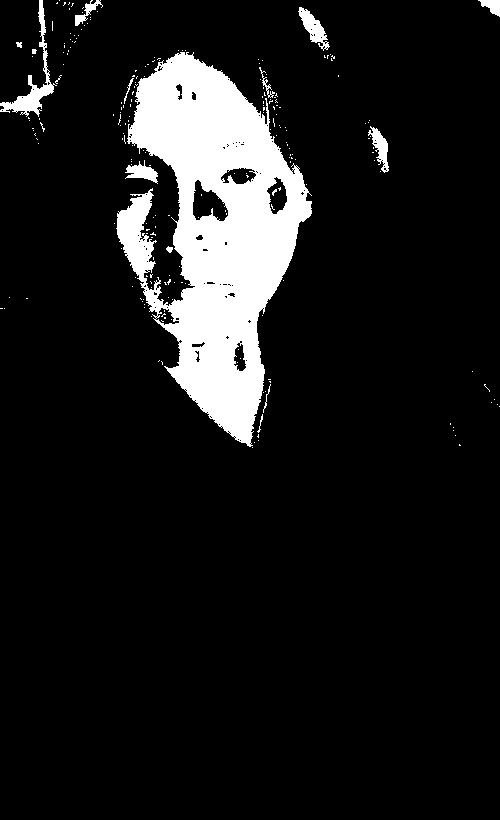

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


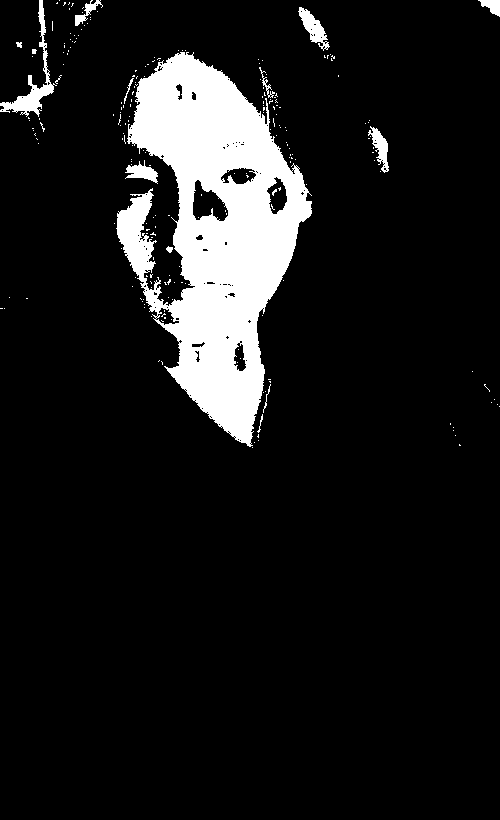

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


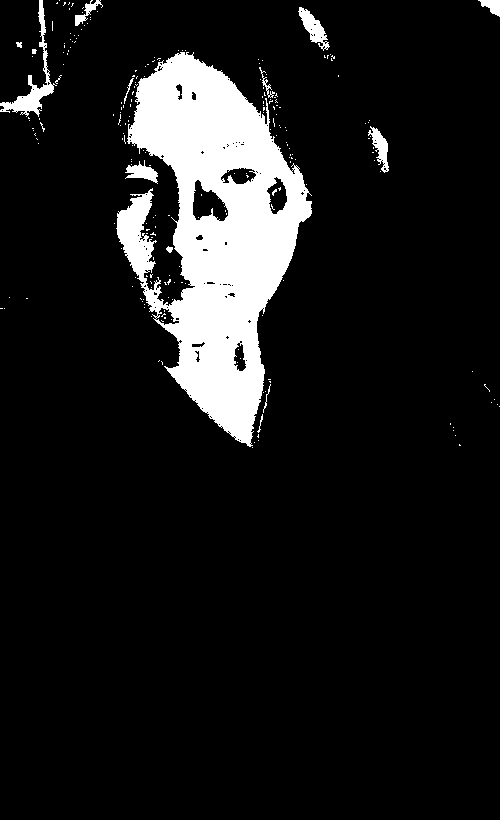

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


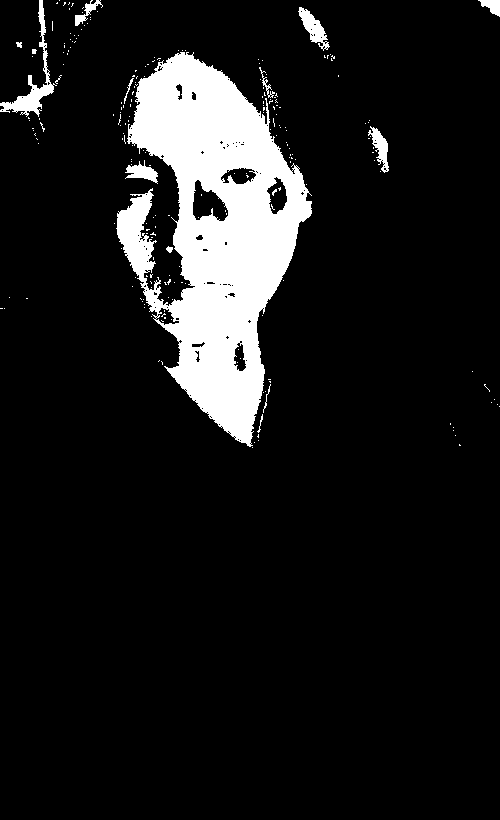

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


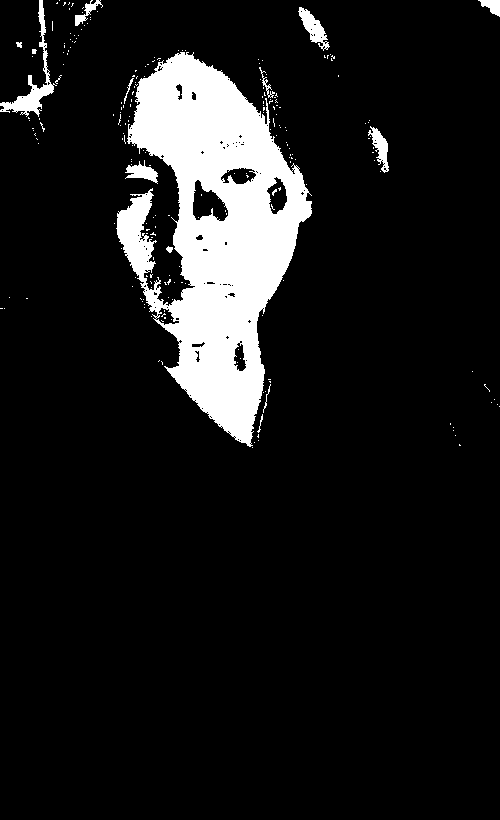

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


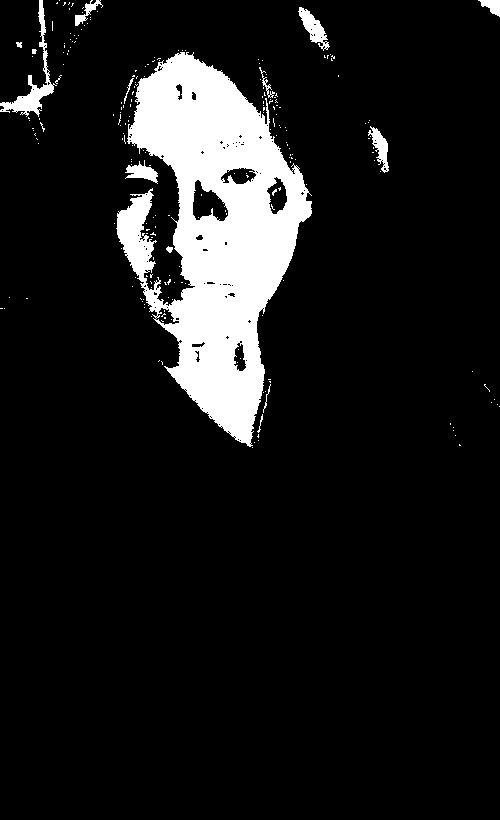

10% of the image is skin
closing mask of shape (820, 500)
processing image of shape (820, 500, 3)
getting hsv mask
getting rgb mask
float64
float64
float64
getting ycrcb mask
mask: 


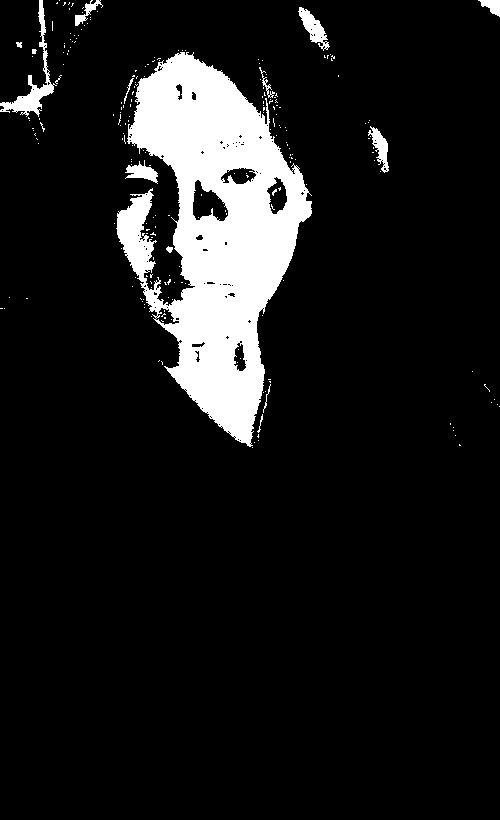

10% of the image is skin
closing mask of shape (820, 500)


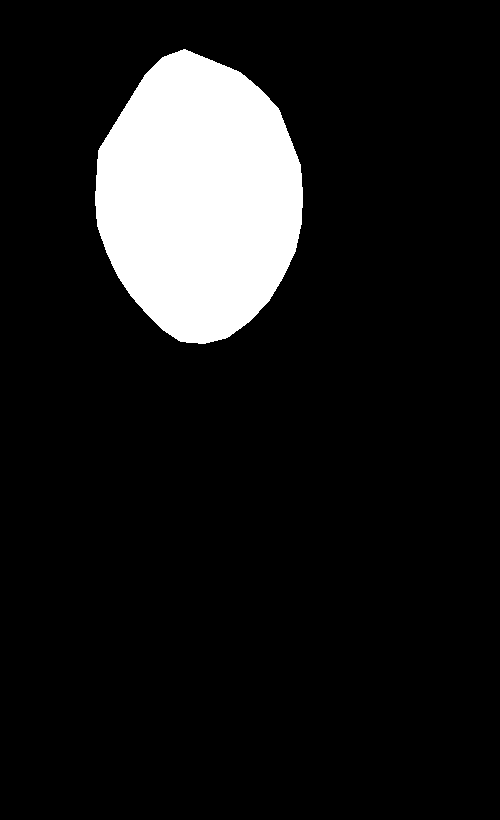

Mask: 



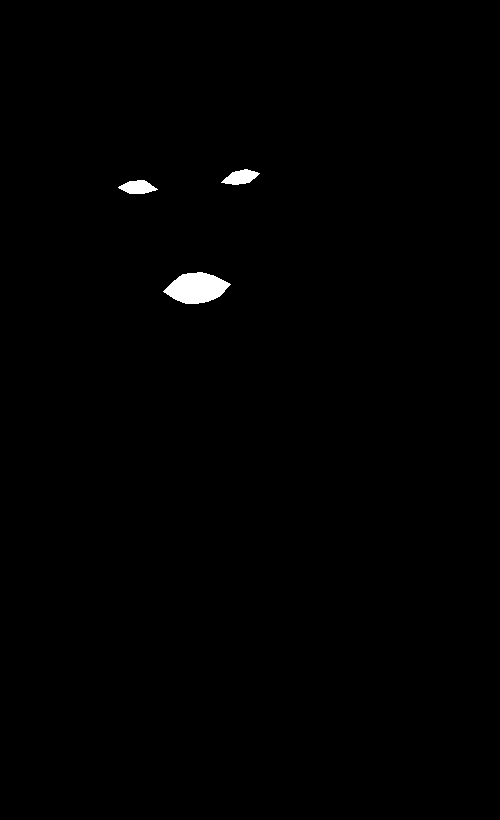

Dilated Mask: 



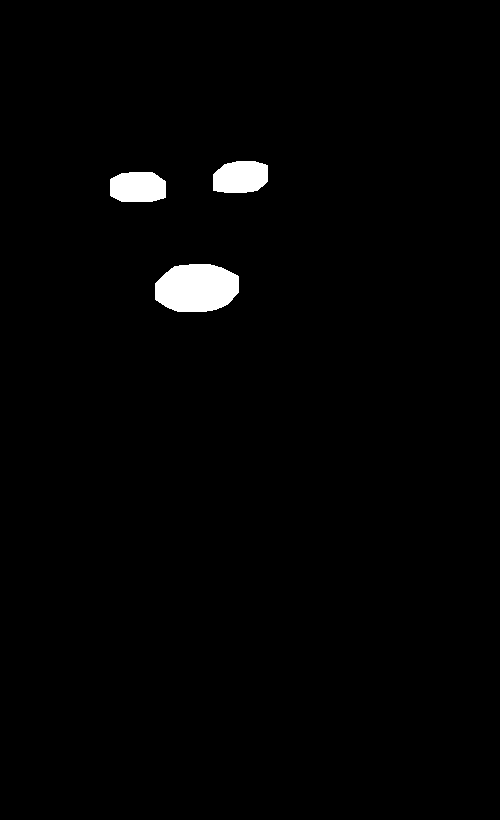

Nose Mask: 



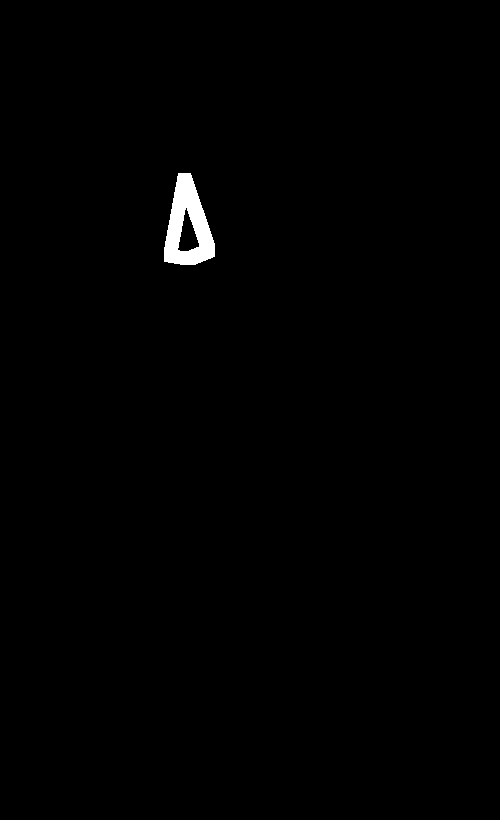

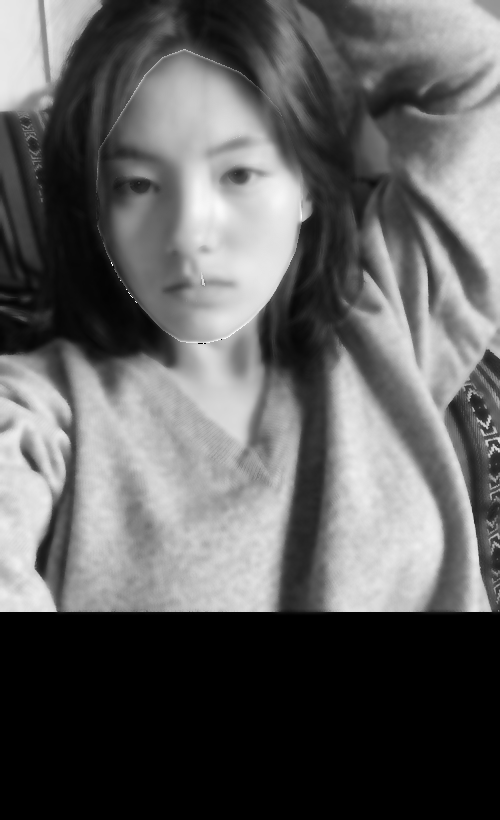

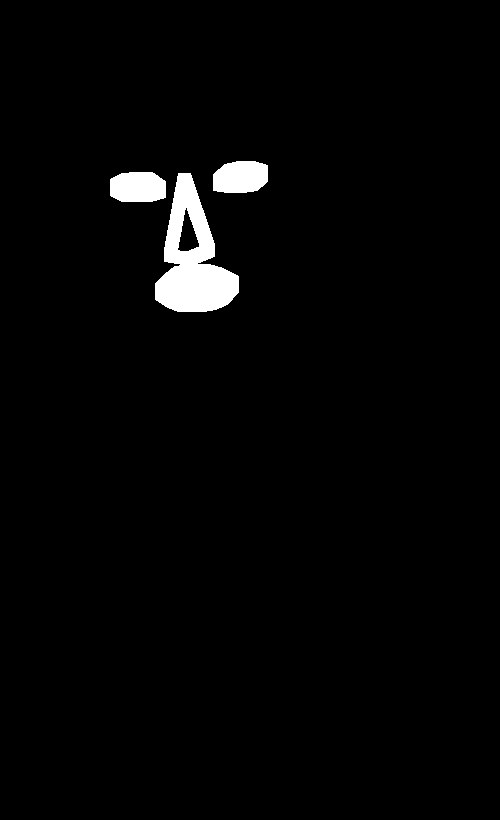

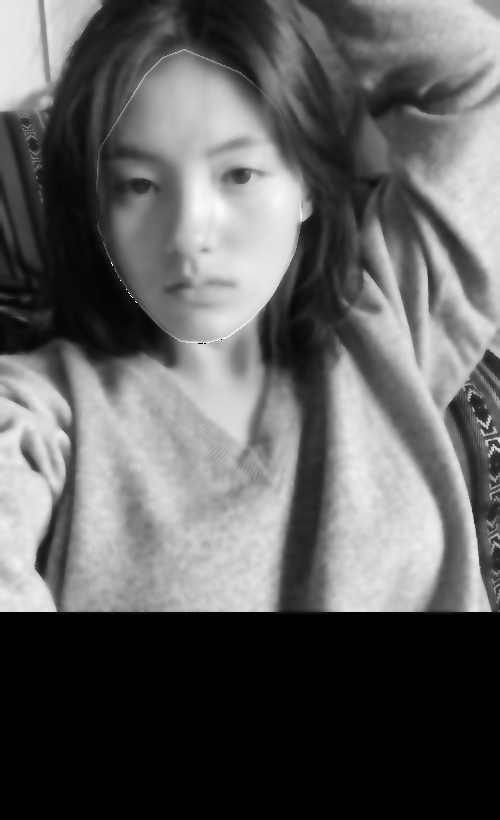

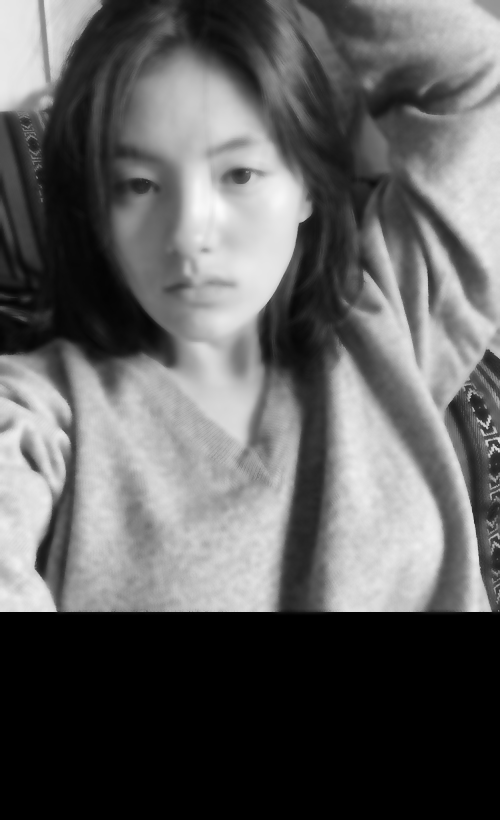

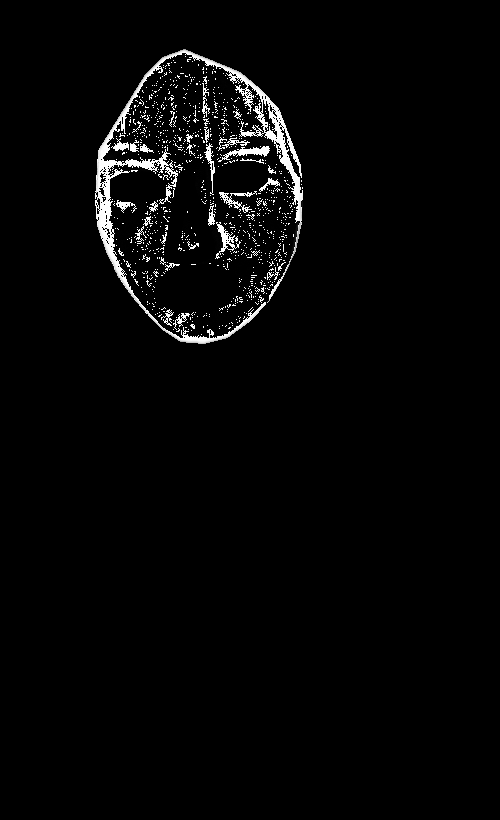

Histogram remapping for reference image 'E' ...
1316
0.07598784194528875  %
max =  0.9919106221362428
0.1519756838905775  %
max =  0.9021954345625328
0.22796352583586624  %
max =  0.904834833170192
0.303951367781155  %
max =  0.9039662805962508
0.3799392097264438  %
max =  0.901974067304931
0.4559270516717325  %
max =  0.995833309294443
0.5319148936170213  %
max =  0.9046538266062795
0.60790273556231  %
max =  0.9044937906790249
0.6838905775075987  %
max =  0.9037412009838748
0.7598784194528876  %
max =  0.904270469800908
0.8358662613981762  %
max =  0.9975039097153243
0.911854103343465  %
max =  0.8994520280712651
0.9878419452887538  %
max =  0.8952191428972973
1.0638297872340425  %
max =  0.8899522715702217
1.1398176291793314  %
max =  0.9892760949172613
1.21580547112462  %
max =  0.9961902397134791
1.2917933130699089  %
max =  0.9048212752195469
1.3677811550151975  %
max =  0.9039351667772623
1.4437689969604863  %
max =  0.9002968086659733
1.5197568389057752  %
max =  0.992835957738

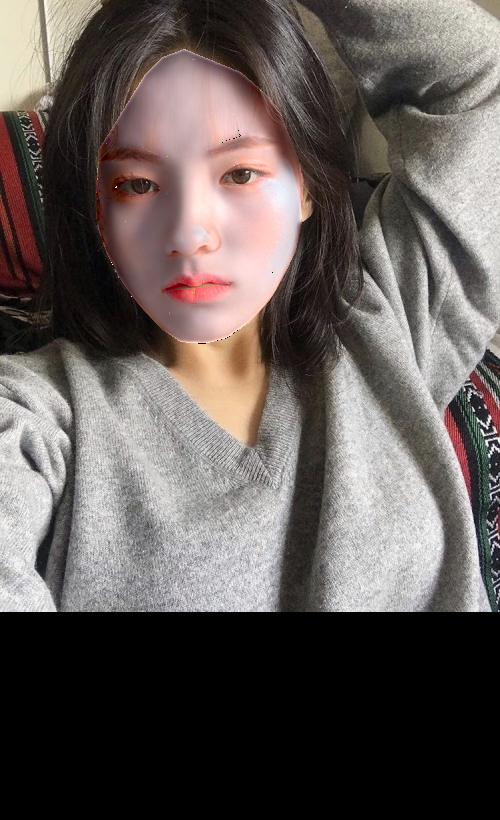

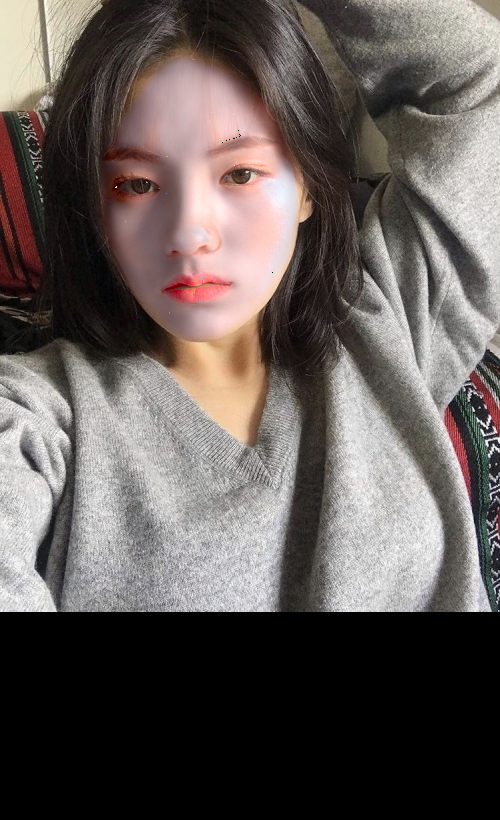

In [ ]:
subject = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/Kim_Yong_Ji.jpg', 1)
target = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FinalProject_CV/target_15.jpg', 1)
subject = imutils.resize(subject, width=500)
target = imutils.resize(target, width=500)
sub, warped_tar = warp_target(subject, target)
apply_makeup(sub, warped_tar)